In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sbpy.calib import Sun
from astropy import units as u
from astropy.io import fits

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from astropy.visualization import ImageNormalize, PercentileInterval, AsinhStretch

from lvmdrp import __version__
from lvmdrp.core.constants import LVM_UNAM_URL
from lvmdrp.utils.examples import fetch_example_data, get_frames_metadata

from lvmdrp.core import rss, image, spectrum1d
from lvmdrp.functions import imageMethod, rssMethod, fluxCalMethod

plt.style.use("seaborn-v0_8-talk")

In [2]:
from tree import Tree
t=Tree('sdss5')
from sdss_access.path import Path
pp = Path('sdss5')

In [8]:
os.path.expanduser('~')
os.environ['LVMCORE_DIR']='/Users/Brian/Work/github_projects/sdss/lvm/lvmcore'

In [4]:
# define input data directory
#data_path = os.path.abspath(os.path.join("..", "data"))
data_path = os.getenv("LVM_DATA_S")
print(data_path)

# let's create the output directory
#output_path = "./data"
output_path = os.getenv("LVM_SPECTRO_REDUX")
os.makedirs(output_path, exist_ok=True)

# create processed frames path template
out_main_path = os.path.join(output_path, "lvm-{kind}-{camera}-{expnum}.{ext}")
out_calib_path = os.path.join(output_path, "lvm-{mjd}-{kind}-{camera}-{exptime}.{ext}")

print(out_main_path)
print(out_calib_path)

/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco
/Users/Brian/Work/sdss/sas/sdsswork/lvm/spectro/redux/lvm-{kind}-{camera}-{expnum}.{ext}
/Users/Brian/Work/sdss/sas/sdsswork/lvm/spectro/redux/lvm-{mjd}-{kind}-{camera}-{exptime}.{ext}


In [5]:
import pathlib
path = pathlib.Path(data_path)
list(path.rglob('60010/*.fit*'))

[PosixPath('/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-z1-00000201.fits.gz'),
 PosixPath('/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-z1-00000183.fits.gz'),
 PosixPath('/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-b1-00000175.fits.gz'),
 PosixPath('/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-b1-00000202.fits.gz'),
 PosixPath('/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-r1-00000085.fits.gz'),
 PosixPath('/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-b1-00000199.fits.gz'),
 PosixPath('/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-z1-00000176.fits.gz'),
 PosixPath('/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-z1-00000200.fits.gz'),
 PosixPath('/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-z1-00000182.fits.gz'),
 PosixPath('/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-b1-00000182.fits.gz'),
 PosixPath('/Users/Brian/Work/sdss/sas/s

In [6]:
rr=pathlib.Path(pp.location('lvm_raw', mjd=60010, hemi='s', camspec='*', expnum='*'))
print(rr.name, rr.parent)

list(path.rglob(str(rr)))

sdR-s-*-0000000*.fits.gz sdsswork/data/lvm/lco/60010


[]

In [10]:
get_frames_metadata(60010, ignore_cache=False)

[INFO]: loading cached metadata from '/Users/Brian/Work/sdss/sas/sdsswork/lvm/sandbox/lvm_metadata_60010.pkl'


imagetyp,spec,mjd,camera,expnum,exptime,tileid,path
str6,str3,int64,str2,str8,float64,int64,str80
object,sp1,60010,z1,00000201,30.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-z1-00000201.fits.gz
dark,sp1,60010,z1,00000183,300.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-z1-00000183.fits.gz
bias,sp1,60010,b1,00000175,0.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-b1-00000175.fits.gz
object,sp1,60010,b1,00000202,30.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-b1-00000202.fits.gz
arc,sp1,60010,r1,00000085,3.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-r1-00000085.fits.gz
flat,sp1,60010,b1,00000199,240.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-b1-00000199.fits.gz
bias,sp1,60010,z1,00000176,0.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-z1-00000176.fits.gz
object,sp1,60010,z1,00000200,30.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-z1-00000200.fits.gz
dark,sp1,60010,z1,00000182,300.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-z1-00000182.fits.gz


In [11]:
# extract metadata
#frames_table = get_frames_metadata(path=os.path.join(data_path, "lco_com"), ignore_cache=False)
frames_table = get_frames_metadata(mjd=60010, ignore_cache=False)

[INFO]: loading cached metadata from '/Users/Brian/Work/sdss/sas/sdsswork/lvm/sandbox/lvm_metadata_60010.pkl'


In [12]:

# group by imagetyp, camera and exptime
frames_table = frames_table.group_by(["mjd", "imagetyp", "spec", "camera", "expnum", "exptime", "tileid"])
# define groups and unique categories in those groups
frames_groups = frames_table.groups
unique_groups = frames_groups.keys

In [13]:
frames_table

imagetyp,spec,mjd,camera,expnum,exptime,tileid,path
str6,str3,int64,str2,str8,float64,int64,str80
arc,sp1,60010,b1,00000085,3.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-b1-00000085.fits.gz
arc,sp1,60010,b1,00000086,3.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-b1-00000086.fits.gz
arc,sp1,60010,b1,00000087,3.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-b1-00000087.fits.gz
arc,sp1,60010,r1,00000085,3.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-r1-00000085.fits.gz
arc,sp1,60010,r1,00000086,3.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-r1-00000086.fits.gz
arc,sp1,60010,r1,00000087,3.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-r1-00000087.fits.gz
arc,sp1,60010,z1,00000085,3.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-z1-00000085.fits.gz
arc,sp1,60010,z1,00000086,3.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-z1-00000086.fits.gz
arc,sp1,60010,z1,00000087,3.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-z1-00000087.fits.gz


In [14]:
pp.extract("lvm_raw", frames_table['path'][0])

{'mjd': '60010', 'hemi': 's', 'camspec': 'b1', 'expnum': '00000085'}

In [15]:
pp.extract("lvm_raw", "/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/59580/sdR-z1-00000087.fits.gz")

{}

In [16]:
pp.full('lvm_anc')

KeyError: "Missing required keyword arguments: ['kind', 'tileid', 'drpver', 'expnum', 'mjd', 'imagetype', 'camera']"

In [17]:
from astropy.io import fits
hdu = fits.open(frames_table['path'][0])
hdu.info()
hdu[0].header

Filename: /Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-b1-00000085.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (4120, 4080)   int16 (rescales to uint16)   


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4120                                                  
NAXIS2  =                 4080                                                  
V_ARCHON= '0.8.0   '                                                            
FILENAME= 'sdR-s-b1-00000085.fits.gz' / File basename                           
EXPOSURE=                   85 / Exposure number                                
SPEC    = 'sp1     '           / Spectrograph name                              
OBSERVAT= 'LCO     '           / Observatory                                    
OBSTIME = '2023-03-07T00:51:24.700' / Start of the observation                  
MJD     =                60010 / Modified Julian Date                           
EXPTIME =                  3

In [18]:
frames_groups
unique_groups

mjd,imagetyp,spec,camera,expnum,exptime,tileid
int64,str6,str3,str2,str8,float64,int64
60010,arc,sp1,b1,00000085,3.0,1111
60010,arc,sp1,b1,00000086,3.0,1111
60010,arc,sp1,b1,00000087,3.0,1111
60010,arc,sp1,r1,00000085,3.0,1111
60010,arc,sp1,r1,00000086,3.0,1111
60010,arc,sp1,r1,00000087,3.0,1111
60010,arc,sp1,z1,00000085,3.0,1111
60010,arc,sp1,z1,00000086,3.0,1111
60010,arc,sp1,z1,00000087,3.0,1111


In [19]:
pp.full('lvm_anc', kind='p', imagetype='bias', mjd=59580, camera='b1', drpver='1.1.0',expnum=11, tileid=1111)

'/Users/Brian/Work/sdss/sas/sdsswork/lvm/spectro/redux/1.1.0/1111/59580/ancillary/lvm-pbias-b1-00000011.fits'

In [17]:
mjds
cameras

NameError: name 'mjds' is not defined

In [20]:
spec=1
camera='b1'
mjd = 59580
sub=(unique_groups["mjd"]==mjd)&(unique_groups["imagetyp"]=="bias")&(unique_groups["spec"]==f"sp{spec}")&(unique_groups["camera"]==f"{camera}{spec}")
#sub=(unique_groups["mjd"]==mjd)
frames_groups[sub]

imagetyp,spec,mjd,camera,expnum,exptime,tileid,path
str6,str3,int64,str2,str8,float64,int64,str80


In [21]:
gg=frames_table[frames_table['imagetyp']=='bias'].group_by(['camera', 'expnum'])
gg.groups[2]

imagetyp,spec,mjd,camera,expnum,exptime,tileid,path
str6,str3,int64,str2,str8,float64,int64,str80
bias,sp1,60010,r1,00000175,0.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-r1-00000175.fits.gz


In [22]:
pp.full("lvm_cal_mbias", mjd='59580', drpver='1.1.0', camera='b1', tileid='1111')

'/Users/Brian/Work/sdss/sas/sdsswork/lvm/spectro/redux/1.1.0/1111/59580/calib/lvm-mbias-b1.fits'

In [23]:
pp.full("lvm_cal_time", mjd='59580', drpver='1.1.0', camera='b1', tileid='1111', kind='mbias', exptime=30)

'/Users/Brian/Work/sdss/sas/sdsswork/lvm/spectro/redux/1.1.0/1111/59580/calib/lvm-mbias-b1-30.fits'

In [24]:
pp.full("lvm_cal_time", mjd='59580', drpver='1.1.0', camera='b1', tileid='1111', kind='mbias', exptime=30, compress=False)

'/Users/Brian/Work/sdss/sas/sdsswork/lvm/spectro/redux/1.1.0/1111/59580/calib/lvm-mbias-b1-30.fits'

In [25]:
frames_table[frames_table['imagetyp']=='bias']


imagetyp,spec,mjd,camera,expnum,exptime,tileid,path
str6,str3,int64,str2,str8,float64,int64,str80
bias,sp1,60010,b1,00000175,0.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-b1-00000175.fits.gz
bias,sp1,60010,b1,00000176,0.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-b1-00000176.fits.gz
bias,sp1,60010,r1,00000175,0.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-r1-00000175.fits.gz
bias,sp1,60010,r1,00000176,0.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-r1-00000176.fits.gz
bias,sp1,60010,z1,00000175,0.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-z1-00000175.fits.gz
bias,sp1,60010,z1,00000176,0.0,1111,/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-z1-00000176.fits.gz


In [26]:
#pp.templates['lvm_anc']
pp.full('lvm_anc', kind='p', imagetype='bias', mjd=row['mjd'], camera=row['camera'], drpver=__version__,expnum=row['expnum'], tileid=row['tileid'])


NameError: name 'row' is not defined

In [55]:

#biases = frames_groups[(unique_groups["mjd"]==mjd)&(unique_groups["imagetyp"]=="bias")&(unique_groups["spec"]==f"sp{spec}")&(unique_groups["camera"]==f"{camera}{spec}")]
sub = frames_table[frames_table['imagetyp']=='bias']

bpaths = []
for row in sub:
    raw_path = row["path"]
    pbias_path = pp.full('lvm_anc', kind='p', imagetype='bias', mjd=row['mjd'], camera=row['camera'], drpver=__version__,expnum=row['expnum'], tileid=row['tileid'])
    print(pbias_path)
    imageMethod.preprocRawFrame_drp(
        in_image=raw_path,
        out_image=pbias_path,
        subtract_overscan=True, unit="electron", compute_error=True,
        os_bound_y="1,4080", os_bound_x="2044,2077")
    bpaths.append(pbias_path)

master_bias = pp.full("lvm_cal_mbias", mjd=mjd, drpver=__version__, camera=bias_camera, tileid=bias_tileid)
        #master_bias = pp.full("lvm_cal_time", mjd=mjd, drpver=__version__, camera=bias_camera, tileid=bias_tileid, kind='mbias', exptime=int(bias_frame['exptime']))
print('master bias', master_bias)

imageMethod.createMasterFrame_drp(
   in_images=pbias_paths,
   out_image=master_bias)


/Users/Brian/Work/sdss/sas/sdsswork/lvm/spectro/redux/0.1.0/1111/60010/ancillary/lvm-pbias-b1-00000175.fits


[INFO]: using given overscan region Y = ['1', '4080'], X = ['2044', '2077']
[WARNING]: assuming 'TRIMSEC' YX_i = (['1', '4080'], ['1', '2043']), YX_f = (['1', '4080'], ['2078', '4120'])
[INFO]: median counts in overscan sections {'a': 999.0, 'b': 1000.0, 'c': 999.0, 'd': 999.0}
[INFO]: standard deviation in overscan sections {'a': 0.73717386, 'b': 0.78912497, 'c': 0.71567535, 'd': 0.77051276}
[INFO]: extracted gain values 'GAIN' = {'a': 2.71, 'b': 2.71, 'c': 2.68, 'd': 2.69}
[INFO]: extracted rdnoise values 'RDNOISE' = {'a': 3.0, 'b': 3.0, 'c': 2.8, 'd': 2.8}
[INFO]: converting from ADU to e-
[INFO]: calculated Poisson errors for amplifier 'a'
[INFO]: calculated Poisson errors for amplifier 'b'
[INFO]: calculated Poisson errors for amplifier 'c'
[INFO]: calculated Poisson errors for amplifier 'd'
[INFO]: flipping along X-axis
[INFO]: building pixel mask
[INFO]: 10597915 (64 %) pixels masked
[INFO]: updating header and writing pre-processed frame to '/Users/Brian/Work/sdss/sas/sdsswork/

/Users/Brian/Work/sdss/sas/sdsswork/lvm/spectro/redux/0.1.0/1111/60010/ancillary/lvm-pbias-b1-00000176.fits


[INFO]: using given overscan region Y = ['1', '4080'], X = ['2044', '2077']
[WARNING]: assuming 'TRIMSEC' YX_i = (['1', '4080'], ['1', '2043']), YX_f = (['1', '4080'], ['2078', '4120'])
[INFO]: median counts in overscan sections {'a': 1000.0, 'b': 1000.0, 'c': 999.0, 'd': 999.0}
[INFO]: standard deviation in overscan sections {'a': 0.7367415, 'b': 0.78937745, 'c': 0.72518015, 'd': 0.7636367}
[INFO]: extracted gain values 'GAIN' = {'a': 2.71, 'b': 2.71, 'c': 2.68, 'd': 2.69}
[INFO]: extracted rdnoise values 'RDNOISE' = {'a': 3.0, 'b': 3.0, 'c': 2.8, 'd': 2.8}
[INFO]: converting from ADU to e-
[INFO]: calculated Poisson errors for amplifier 'a'
[INFO]: calculated Poisson errors for amplifier 'b'
[INFO]: calculated Poisson errors for amplifier 'c'
[INFO]: calculated Poisson errors for amplifier 'd'
[INFO]: flipping along X-axis
[INFO]: building pixel mask
[INFO]: 12396115 (74 %) pixels masked
[INFO]: updating header and writing pre-processed frame to '/Users/Brian/Work/sdss/sas/sdsswork/l

/Users/Brian/Work/sdss/sas/sdsswork/lvm/spectro/redux/0.1.0/1111/60010/ancillary/lvm-pbias-r1-00000175.fits


[INFO]: using given overscan region Y = ['1', '4080'], X = ['2044', '2077']
[WARNING]: assuming 'TRIMSEC' YX_i = (['1', '4080'], ['1', '2043']), YX_f = (['1', '4080'], ['2078', '4120'])
[INFO]: median counts in overscan sections {'a': 979.0, 'b': 992.0, 'c': 989.0, 'd': 987.0}
[INFO]: standard deviation in overscan sections {'a': 2.3086674, 'b': 2.37537, 'c': 2.2627566, 'd': 2.3038702}
[INFO]: extracted gain values 'GAIN' = {'a': 2.75, 'b': 2.79, 'c': 2.68, 'd': 2.74}
[INFO]: extracted rdnoise values 'RDNOISE' = {'a': 3.2, 'b': 3.3, 'c': 3.0, 'd': 3.1}
[INFO]: converting from ADU to e-
[INFO]: calculated Poisson errors for amplifier 'a'
[INFO]: calculated Poisson errors for amplifier 'b'
[INFO]: calculated Poisson errors for amplifier 'c'
[INFO]: calculated Poisson errors for amplifier 'd'
[INFO]: building pixel mask
[INFO]: 6461618 (39 %) pixels masked
[INFO]: updating header and writing pre-processed frame to '/Users/Brian/Work/sdss/sas/sdsswork/lvm/spectro/redux/0.1.0/1111/60010/anc

/Users/Brian/Work/sdss/sas/sdsswork/lvm/spectro/redux/0.1.0/1111/60010/ancillary/lvm-pbias-r1-00000176.fits


[INFO]: using given overscan region Y = ['1', '4080'], X = ['2044', '2077']
[WARNING]: assuming 'TRIMSEC' YX_i = (['1', '4080'], ['1', '2043']), YX_f = (['1', '4080'], ['2078', '4120'])
[INFO]: median counts in overscan sections {'a': 993.0, 'b': 1008.0, 'c': 1001.0, 'd': 1001.0}
[INFO]: standard deviation in overscan sections {'a': 2.5146103, 'b': 2.412939, 'c': 2.3334353, 'd': 2.3851044}
[INFO]: extracted gain values 'GAIN' = {'a': 2.75, 'b': 2.79, 'c': 2.68, 'd': 2.74}
[INFO]: extracted rdnoise values 'RDNOISE' = {'a': 3.2, 'b': 3.3, 'c': 3.0, 'd': 3.1}
[INFO]: converting from ADU to e-
[INFO]: calculated Poisson errors for amplifier 'a'
[INFO]: calculated Poisson errors for amplifier 'b'
[INFO]: calculated Poisson errors for amplifier 'c'
[INFO]: calculated Poisson errors for amplifier 'd'
[INFO]: building pixel mask
[INFO]: 2789217 (17 %) pixels masked
[INFO]: updating header and writing pre-processed frame to '/Users/Brian/Work/sdss/sas/sdsswork/lvm/spectro/redux/0.1.0/1111/60010

/Users/Brian/Work/sdss/sas/sdsswork/lvm/spectro/redux/0.1.0/1111/60010/ancillary/lvm-pbias-z1-00000175.fits


[INFO]: using given overscan region Y = ['1', '4080'], X = ['2044', '2077']
[WARNING]: assuming 'TRIMSEC' YX_i = (['1', '4080'], ['1', '2043']), YX_f = (['1', '4080'], ['2078', '4120'])
[INFO]: median counts in overscan sections {'a': 1005.0, 'b': 1011.0, 'c': 995.0, 'd': 993.0}
[INFO]: standard deviation in overscan sections {'a': 1.1856948, 'b': 1.2193406, 'c': 1.1906952, 'd': 1.2083259}
[INFO]: extracted gain values 'GAIN' = {'a': 2.76, 'b': 2.65, 'c': 2.89, 'd': 2.78}
[INFO]: extracted rdnoise values 'RDNOISE' = {'a': 3.6, 'b': 3.6, 'c': 3.4, 'd': 3.6}
[INFO]: converting from ADU to e-
[INFO]: calculated Poisson errors for amplifier 'a'
[INFO]: calculated Poisson errors for amplifier 'b'
[INFO]: calculated Poisson errors for amplifier 'c'
[INFO]: calculated Poisson errors for amplifier 'd'
[INFO]: flipping along X-axis
[INFO]: building pixel mask
[INFO]: 10797686 (65 %) pixels masked
[INFO]: updating header and writing pre-processed frame to '/Users/Brian/Work/sdss/sas/sdsswork/lvm

/Users/Brian/Work/sdss/sas/sdsswork/lvm/spectro/redux/0.1.0/1111/60010/ancillary/lvm-pbias-z1-00000176.fits


[INFO]: using given overscan region Y = ['1', '4080'], X = ['2044', '2077']
[WARNING]: assuming 'TRIMSEC' YX_i = (['1', '4080'], ['1', '2043']), YX_f = (['1', '4080'], ['2078', '4120'])
[INFO]: median counts in overscan sections {'a': 1005.0, 'b': 1011.0, 'c': 994.0, 'd': 993.0}
[INFO]: standard deviation in overscan sections {'a': 1.1902398, 'b': 1.2109663, 'c': 1.1354965, 'd': 1.1409088}
[INFO]: extracted gain values 'GAIN' = {'a': 2.76, 'b': 2.65, 'c': 2.89, 'd': 2.78}
[INFO]: extracted rdnoise values 'RDNOISE' = {'a': 3.6, 'b': 3.6, 'c': 3.4, 'd': 3.6}
[INFO]: converting from ADU to e-
[INFO]: calculated Poisson errors for amplifier 'a'
[INFO]: calculated Poisson errors for amplifier 'b'
[INFO]: calculated Poisson errors for amplifier 'c'
[INFO]: calculated Poisson errors for amplifier 'd'
[INFO]: flipping along X-axis
[INFO]: building pixel mask
[INFO]: 11164393 (67 %) pixels masked
[INFO]: updating header and writing pre-processed frame to '/Users/Brian/Work/sdss/sas/sdsswork/lvm

In [59]:
import itertools as it
from lvmdrp import __version__

mjds = np.unique(unique_groups["mjd"])
cameras = ["b", "r", "z"]
spec = 1
for mjd, camera in it.product(mjds, cameras):
    biases = frames_groups[(unique_groups["mjd"]==mjd)&(unique_groups["imagetyp"]=="bias")&(unique_groups["spec"]==f"sp{spec}")&(unique_groups["camera"]==f"{camera}{spec}")]
    #biases.pprint(max_width=200)
    print(mjd, camera)
    #print(biases)
    # let's pre-process the all bias frames
    pbias_paths = []
    for bias_frame in biases:
        bias_path = bias_frame["path"]
        print(bias_path)
        bias_camera, bias_expnum, bias_tileid = bias_frame["camera"], bias_frame["expnum"], bias_frame["tileid"]

        #pbias_path = out_main_path.format(kind="pbias", camera=bias_camera, expnum=bias_expnum, ext="fits")
        pbias_path = pp.full('lvm_anc', kind='p', imagetype='bias', mjd=mjd, camera=bias_camera, drpver=__version__,expnum=bias_expnum, tileid=bias_tileid)
        
        #print(pbias_path)
        imageMethod.preprocRawFrame_drp(
           in_image=bias_path,
           out_image=pbias_path,
           subtract_overscan=True, unit="electron", compute_error=True,
           os_bound_y="1,4080", os_bound_x="2044,2077"
        )
        pbias_paths.append(pbias_path)

        #master_bias = out_calib_path.format(mjd=mjd, kind="mbias", camera=bias_camera, exptime=int(bias_frame["exptime"]), ext="fits")
        master_bias = pp.full("lvm_cal_mbias", mjd=mjd, drpver=__version__, camera=bias_camera, tileid=bias_tileid)
        #master_bias = pp.full("lvm_cal_time", mjd=mjd, drpver=__version__, camera=bias_camera, tileid=bias_tileid, kind='mbias', exptime=int(bias_frame['exptime']))
        print('master bias', master_bias)

    imageMethod.createMasterFrame_drp(
       in_images=pbias_paths,
       out_image=master_bias)
    

    print(len(pbias_paths))
    print(pbias_paths)

60010 b
/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-b1-00000175.fits.gz


[INFO]: using given overscan region Y = ['1', '4080'], X = ['2044', '2077']
[WARNING]: assuming 'TRIMSEC' YX_i = (['1', '4080'], ['1', '2043']), YX_f = (['1', '4080'], ['2078', '4120'])
[INFO]: median counts in overscan sections {'a': 999.0, 'b': 1000.0, 'c': 999.0, 'd': 999.0}
[INFO]: standard deviation in overscan sections {'a': 0.73717386, 'b': 0.78912497, 'c': 0.71567535, 'd': 0.77051276}
[INFO]: extracted gain values 'GAIN' = {'a': 2.71, 'b': 2.71, 'c': 2.68, 'd': 2.69}
[INFO]: extracted rdnoise values 'RDNOISE' = {'a': 3.0, 'b': 3.0, 'c': 2.8, 'd': 2.8}
[INFO]: converting from ADU to e-
[INFO]: calculated Poisson errors for amplifier 'a'
[INFO]: calculated Poisson errors for amplifier 'b'
[INFO]: calculated Poisson errors for amplifier 'c'
[INFO]: calculated Poisson errors for amplifier 'd'
[INFO]: flipping along X-axis
[INFO]: building pixel mask
[INFO]: 10597915 (64 %) pixels masked
[INFO]: updating header and writing pre-processed frame to '/Users/Brian/Work/sdss/sas/sdsswork/

master bias /Users/Brian/Work/sdss/sas/sdsswork/lvm/spectro/redux/0.1.0/1111/60010/calib/lvm-mbias-b1.fits
/Users/Brian/Work/sdss/sas/sdsswork/data/lvm/lco/60010/sdR-s-b1-00000176.fits.gz


[INFO]: using given overscan region Y = ['1', '4080'], X = ['2044', '2077']
[WARNING]: assuming 'TRIMSEC' YX_i = (['1', '4080'], ['1', '2043']), YX_f = (['1', '4080'], ['2078', '4120'])
[INFO]: median counts in overscan sections {'a': 1000.0, 'b': 1000.0, 'c': 999.0, 'd': 999.0}
[INFO]: standard deviation in overscan sections {'a': 0.7367415, 'b': 0.78937745, 'c': 0.72518015, 'd': 0.7636367}
[INFO]: extracted gain values 'GAIN' = {'a': 2.71, 'b': 2.71, 'c': 2.68, 'd': 2.69}
[INFO]: extracted rdnoise values 'RDNOISE' = {'a': 3.0, 'b': 3.0, 'c': 2.8, 'd': 2.8}
[INFO]: converting from ADU to e-
[INFO]: calculated Poisson errors for amplifier 'a'
[INFO]: calculated Poisson errors for amplifier 'b'
[INFO]: calculated Poisson errors for amplifier 'c'
[INFO]: calculated Poisson errors for amplifier 'd'
[INFO]: flipping along X-axis
[INFO]: building pixel mask
[INFO]: 12396115 (74 %) pixels masked
[INFO]: updating header and writing pre-processed frame to '/Users/Brian/Work/sdss/sas/sdsswork/l

master bias /Users/Brian/Work/sdss/sas/sdsswork/lvm/spectro/redux/0.1.0/1111/60010/calib/lvm-mbias-b1.fits


[INFO]: inside write fits
[INFO]: creating fits hdus 1
[INFO]: starting loop over hdus
[INFO]: creating fits hdus 3 
[INFO]: writing fits 


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/Brian/anaconda3/envs/lvmdrp/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/j6/g80fb5pn2_j41jckdc4hyd5m0000gn/T/ipykernel_27653/797892213.py", line 36, in <module>
    imageMethod.createMasterFrame_drp(
  File "/Users/Brian/Work/github_projects/sdss/lvm/lvmdrp/python/lvmdrp/functions/imageMethod.py", line 3229, in createMasterFrame_drp
  File "/Users/Brian/Work/github_projects/sdss/lvm/lvmdrp/python/lvmdrp/core/image.py", line 944, in writeFitsData
  File "/Users/Brian/anaconda3/envs/lvmdrp/lib/python3.9/site-packages/astropy/io/fits/hdu/hdulist.py", line 1031, in writeto
    fileobj = _File(fileobj, mode=mode, overwrite=overwrite)
  File "/Users/Brian/anaconda3/envs/lvmdrp/lib/python3.9/site-packages/astropy/io/fits/file.py", line 218, in __init__
    self._open_filename(fileobj, mode, overwrite)
  File "/Users/Brian/anacond

In [ ]:
mjds = np.unique(unique_groups["mjd"])
cameras = ["b", "r", "z"]
spec = 1
for mjd, camera in it.product(mjds, cameras):
    darks = frames_groups[(unique_groups["mjd"]==mjd)&(unique_groups["imagetyp"]=="dark")&(unique_groups["spec"]==f"sp{spec}")&(unique_groups["camera"]==f"{camera}{spec}")]
    darks.pprint(max_width=200)
    
    # let's pre-process the all dark frames
    pdark_paths = []
    for dark_frame in darks:
        dark_path = dark_frame["path"]
        dark_camera, dark_expnum = dark_frame["camera"], dark_frame["expnum"]

        pdark_path = out_main_path.format(kind="pdark", camera=dark_camera, expnum=dark_expnum, ext="fits")

        imageMethod.preprocRawFrame_drp(
            in_image=dark_path,
            out_image=pdark_path,
            subtract_overscan=True, unit="electron", compute_error=True,
            os_bound_y="1,4080", os_bound_x="2044,2077"
        )
        pdark_paths.append(pdark_path)

    imageMethod.createMasterFrame_drp(
        in_images=pdark_paths,
        out_image=out_calib_path.format(mjd=mjd, kind="mdark", camera=dark_camera, exptime=int(dark_frame["exptime"]), ext="fits"),
    )

In [6]:
# identify fiberflat
fiberflats = frames_groups[(unique_groups["imagetyp"]=="object")&(unique_groups["spec"]=="sp1")&(unique_groups["expnum"]=="00000199")]
fiberflats.pprint(max_width=200)

for fiberflat_frame in fiberflats:
    fiberflat_path = fiberflat_frame["path"]
    fiberflat_camera, fiberflat_expnum = fiberflat_frame["camera"], fiberflat_frame["expnum"]
    
    if fiberflat_camera == "b1": continue
    
    imageMethod.preprocRawFrame_drp(
        in_image=fiberflat_path,
        out_image=out_main_path.format(kind="pfiberflat", camera=fiberflat_camera, expnum=fiberflat_expnum, ext="fits"),
        subtract_overscan=True, unit="electron", compute_error=True,
        os_bound_y="1,4080", os_bound_x="2044,2077",
        assume_imagetyp="fiberflat"
    )
    # imageMethod.LACosmic_drp(
    #     in_image=out_main_path.format(kind="pfiberflat", camera=fiberflat_camera, expnum=fiberflat_expnum, ext="fits"),
    #     out_image=out_main_path.format(kind="rfiberflat", camera=fiberflat_camera, expnum=fiberflat_expnum, ext="fits"),
    #     iter=3, increase_radius=1, flim=1.3, parallel="auto"
    # )
    imageMethod.basicCalibration_drp(
        in_image=out_main_path.format(kind="pfiberflat", camera=fiberflat_camera, expnum=fiberflat_expnum, ext="fits"),
        out_image=out_main_path.format(kind="cfiberflat", camera=fiberflat_camera, expnum=fiberflat_expnum, ext="fits"),
        in_bias=out_calib_path.format(mjd=mjd, kind="mbias", camera=fiberflat_camera, exptime=0, ext="fits"),
        in_dark=out_calib_path.format(mjd=mjd, kind="mdark", camera=fiberflat_camera, exptime=300, ext="fits")
    )

imagetyp spec  mjd  camera  expnum  exptime                                                                   path                                                                 
-------- ---- ----- ------ -------- ------- ---------------------------------------------------------------------------------------------------------------------------------------
  object  sp1 60010     b1 00000199   240.0 /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/data/lvm/lab/60010/sdR-s-b1-00000199.fits.gz
  object  sp1 60010     r1 00000199   240.0 /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/data/lvm/lab/60010/sdR-s-r1-00000199.fits.gz
  object  sp1 60010     z1 00000199   240.0 /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/data/lvm/lab/60010/sdR-s-z1-00000199.fits.gz
[INFO]: using given overscan region Y = ['1', '4080'], X = ['2044', '2077']
[WARNING]: assuming 'TRI

In [7]:
arcs = frames_groups[(unique_groups["imagetyp"]=="arc")&(unique_groups["spec"]=="sp1")&(unique_groups["expnum"]=="00000250")]
arcs.pprint(max_width=200)

for arc_frame in arcs:
    arc_path = arc_frame["path"]
    arc_camera, arc_expnum = arc_frame["camera"], arc_frame["expnum"]
    
    if arc_camera == "b1": continue
    
    imageMethod.preprocRawFrame_drp(
        in_image=arc_path,
        out_image=out_main_path.format(kind="parc", camera=arc_camera, expnum=arc_expnum, ext="fits"),
        subtract_overscan=True, unit="electron", compute_error=True,
        os_bound_y="1,4080", os_bound_x="2044,2077",
        assume_imagetyp="arc"
    )
    # imageMethod.LACosmic_drp(
    #     in_image=out_main_path.format(kind="parc", camera=arc_camera, expnum=arc_expnum, ext="fits"),
    #     out_image=out_main_path.format(kind="rarc", camera=arc_camera, expnum=arc_expnum, ext="fits"),
    #     iter=3, increase_radius=1, flim=1.3, parallel="auto"
    # )
    imageMethod.basicCalibration_drp(
        in_image=out_main_path.format(kind="parc", camera=arc_camera, expnum=arc_expnum, ext="fits"),
        out_image=out_main_path.format(kind="carc", camera=arc_camera, expnum=arc_expnum, ext="fits"),
        in_bias=out_calib_path.format(mjd=mjd, kind="mbias", camera=arc_camera, exptime=0, ext="fits"),
        in_dark=out_calib_path.format(mjd=mjd, kind="mdark", camera=arc_camera, exptime=60, ext="fits")
    )

imagetyp spec  mjd  camera  expnum  exptime                                                                   path                                                                 
-------- ---- ----- ------ -------- ------- ---------------------------------------------------------------------------------------------------------------------------------------
     arc  sp1 60011     b1 00000250    90.0 /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/data/lvm/lab/60011/sdR-s-b1-00000250.fits.gz
     arc  sp1 60011     r1 00000250    90.0 /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/data/lvm/lab/60011/sdR-s-r1-00000250.fits.gz
     arc  sp1 60011     z1 00000250    90.0 /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/data/lvm/lab/60011/sdR-s-z1-00000250.fits.gz
[INFO]: using given overscan region Y = ['1', '4080'], X = ['2044', '2077']
[WARNING]: assuming 'TRI

[INFO]: selecting column = 1870 to locate fibers
[INFO]: locating fibers
[INFO]: found 0 fibers
[INFO]: refining fiber location
[INFO]: final number of fibers found 0


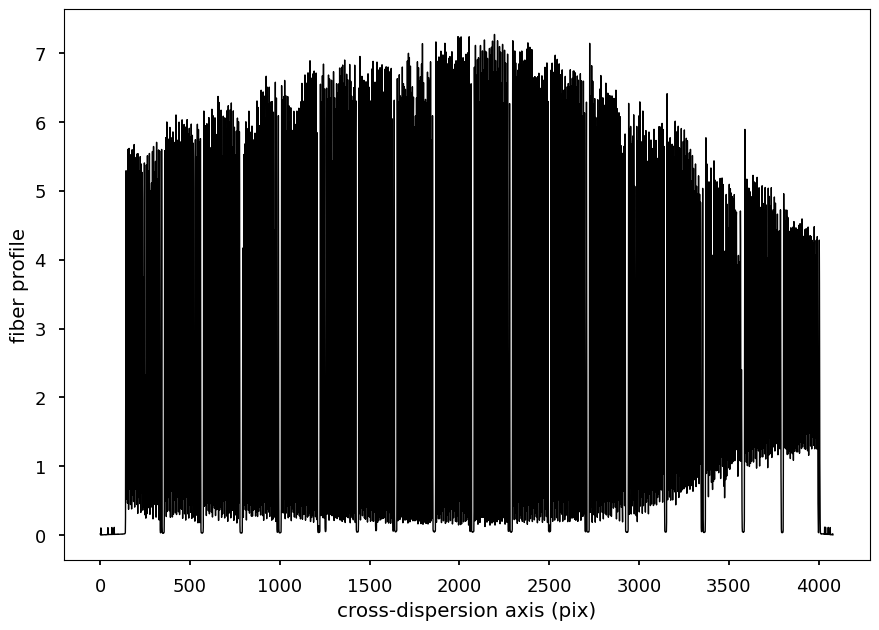

[INFO]: tracing fibers along dispersion axis
tracing fiber right from pixel 1870: 100%|###################################################################| 221/221 [00:00<00:00, 2471.73pixel/s]
[INFO]: fitting trace with 2-deg polynomial


In [35]:
fiberflat_camera = camera = "r1"
fiberflat_expnum = expnum = 199
tileid=1111
mjd=60010
drpver='0.1.0'

out_cal = pp.full("lvm_anc", kind='c', imagetype='fiberflat', mjd=mjd, drpver=drpver, camera=camera, tileid=tileid, expnum=expnum)
out_peaks = pp.full("lvm_cal", drpver=drpver, tileid=tileid, mjd=mjd, camera=camera, expnum=expnum, kind='peaks', ext='txt')
out_trace = pp.full("lvm_cal", drpver=drpver, tileid=tileid, mjd=mjd, camera=camera, expnum=expnum, kind='trace', ext='fits')

imageMethod.find_peaks_auto(
            in_image=out_cal,
            out_peaks=out_peaks,
            nfibers=0, slice=1870, threshold=1000, method="gauss", median_box=5, median_cross=1, plot_fig=True, 
    show_fig=True
        )
imageMethod.trace_peaks(
        in_image=out_cal,
        out_trace=out_trace,
        in_peaks=out_peaks,
        steps=10, coadd=30, threshold_peak=1000, max_diff=2, method="gauss", median_box=5, median_cross=1, 
        poly_disp=2
    )

[INFO]: selecting column = 1870 to locate fibers
[INFO]: locating fibers
[INFO]: found 638 fibers
[INFO]: refining fiber location
[INFO]: final number of fibers found 638


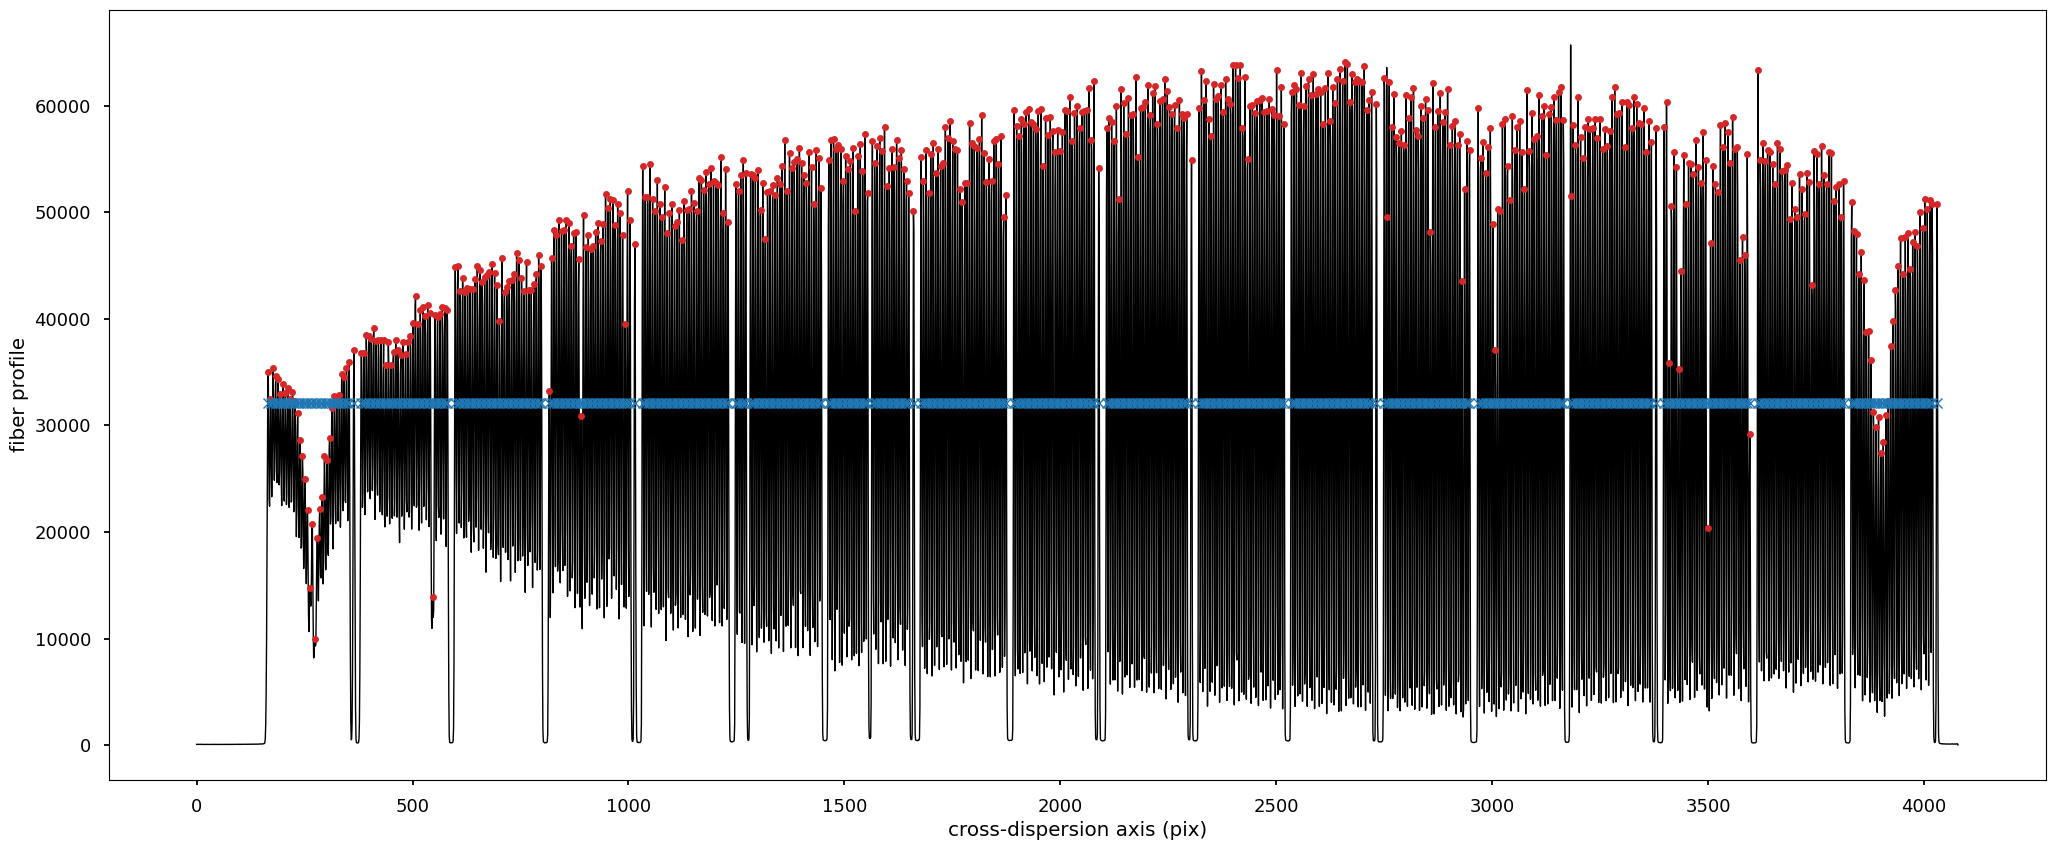

[INFO]: tracing fibers along dispersion axis


tracing fiber right from pixel 1870:  40%|#######################8                                    | 88/221 [00:24<00:37,  3.56pixel/s]

[WARNING]: Number of calls to function has reached maxfev = 9999. (RuntimeWarning)


tracing fiber right from pixel 1870: 100%|###########################################################| 221/221 [01:26<00:00,  2.57pixel/s]


[INFO]: fitting trace with 2-deg polynomial


In [9]:
fiberflat_camera = "z1"

imageMethod.findPeaksAuto_drp(
            in_image=os.path.join(output_path, f"lvm-cfiberflat-{fiberflat_camera}-{fiberflat_expnum}.fits"),
            out_peaks=os.path.join(output_path, f"lvm-peaks-{fiberflat_camera}-{fiberflat_expnum}.txt"),
            nfibers=0, slice=1870, threshold=1000, method="gauss", median_box=5, median_cross=1, plot=1
        )
imageMethod.tracePeaks_drp(
        in_image=os.path.join(output_path, f"lvm-cfiberflat-{fiberflat_camera}-{fiberflat_expnum}.fits"),
        out_trace=os.path.join(output_path, f"lvm-trace-{fiberflat_camera}-{fiberflat_expnum}.fits"),
        in_peaks=os.path.join(output_path, f"lvm-peaks-{fiberflat_camera}-{fiberflat_expnum}.txt"),
        steps=10, coadd=30, threshold_peak=1000, max_diff=2, method="gauss", median_box=5, median_cross=1, plot=True,
        poly_disp=2
    )

[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_r1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 27 percentage masked  7.40741 %
[INFO]: going to use 25 guess lines
[INFO]: reading arc from './data/lvm-xarc-r1-00000250.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 2 pix
[INFO]: measuring arc lines for each fiber from ref_fiber = 319, flux_min = 200.0, fwhm_max = 10.0 and rel_flux_limits = [0.1, 5.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [00:04<00:00, 66.08fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [00:05<00:00, 61.84fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 2-deg polynomials
[INFO]: fitting wavelength solutions using 5-deg polynomials
[WARNING]: fiber 34 has all lines masked
[WARNING]: fiber 69 has all lines masked
[WARNING]: fiber 70 has all lines masked
[WARNING]: fiber 106 has all lines masked
[WARNING]: fiber 141 has all lines masked
[WARNING]: fiber 177 has all lines masked
[WARNING]: fiber 212 has all lines masked
[WARNING]: fiber 246 has all lines masked
[WARNING]: fiber 282 has all lines masked
[WARNING]: fiber 317 has all lines masked
[WARNING]: fiber 352 has all lines masked
[WARNING]: fiber 388 has all lines masked
[WARNING]: fiber 423 has all lines masked
[WARNING]: fiber 459 has all lines masked
[WARNING]: fiber 495 has all lines masked
[WARNING]: fiber 530 has all lines masked
[WARNING]: fiber 601 has all lines masked
[WARNING]: fiber 602 has all lines masked
[WARNING]: fiber 637 has all lines masked
[INFO]: finished wavelength fitting with median RMS = 

measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [00:04<00:00, 72.51fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [00:04<00:00, 71.98fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 2-deg polynomials
[INFO]: fitting wavelength solutions using 5-deg polynomials
[WARNING]: fiber 69 has all lines masked
[WARNING]: fiber 70 has all lines masked
[WARNING]: fiber 106 has all lines masked
[WARNING]: fiber 141 has all lines masked
[WARNING]: fiber 177 has all lines masked
[WARNING]: fiber 212 has all lines masked
[WARNING]: fiber 246 has all lines masked
[WARNING]: fiber 282 has all lines masked
[WARNING]: fiber 317 has all lines masked
[WARNING]: fiber 352 has all lines masked
[WARNING]: fiber 388 has all lines masked
[WARNING]: fiber 423 has all lines masked
[WARNING]: fiber 459 has all lines masked
[WARNING]: fiber 495 has all lines masked
[WARNING]: fiber 530 has all lines masked
[WARNING]: fiber 601 has all lines masked
[WARNING]: fiber 602 has all lines masked
[WARNING]: fiber 637 has all lines masked
[INFO]: finished wavelength fitting with median RMS = 0.0299775 AA
[INFO]: fitting LSF solution

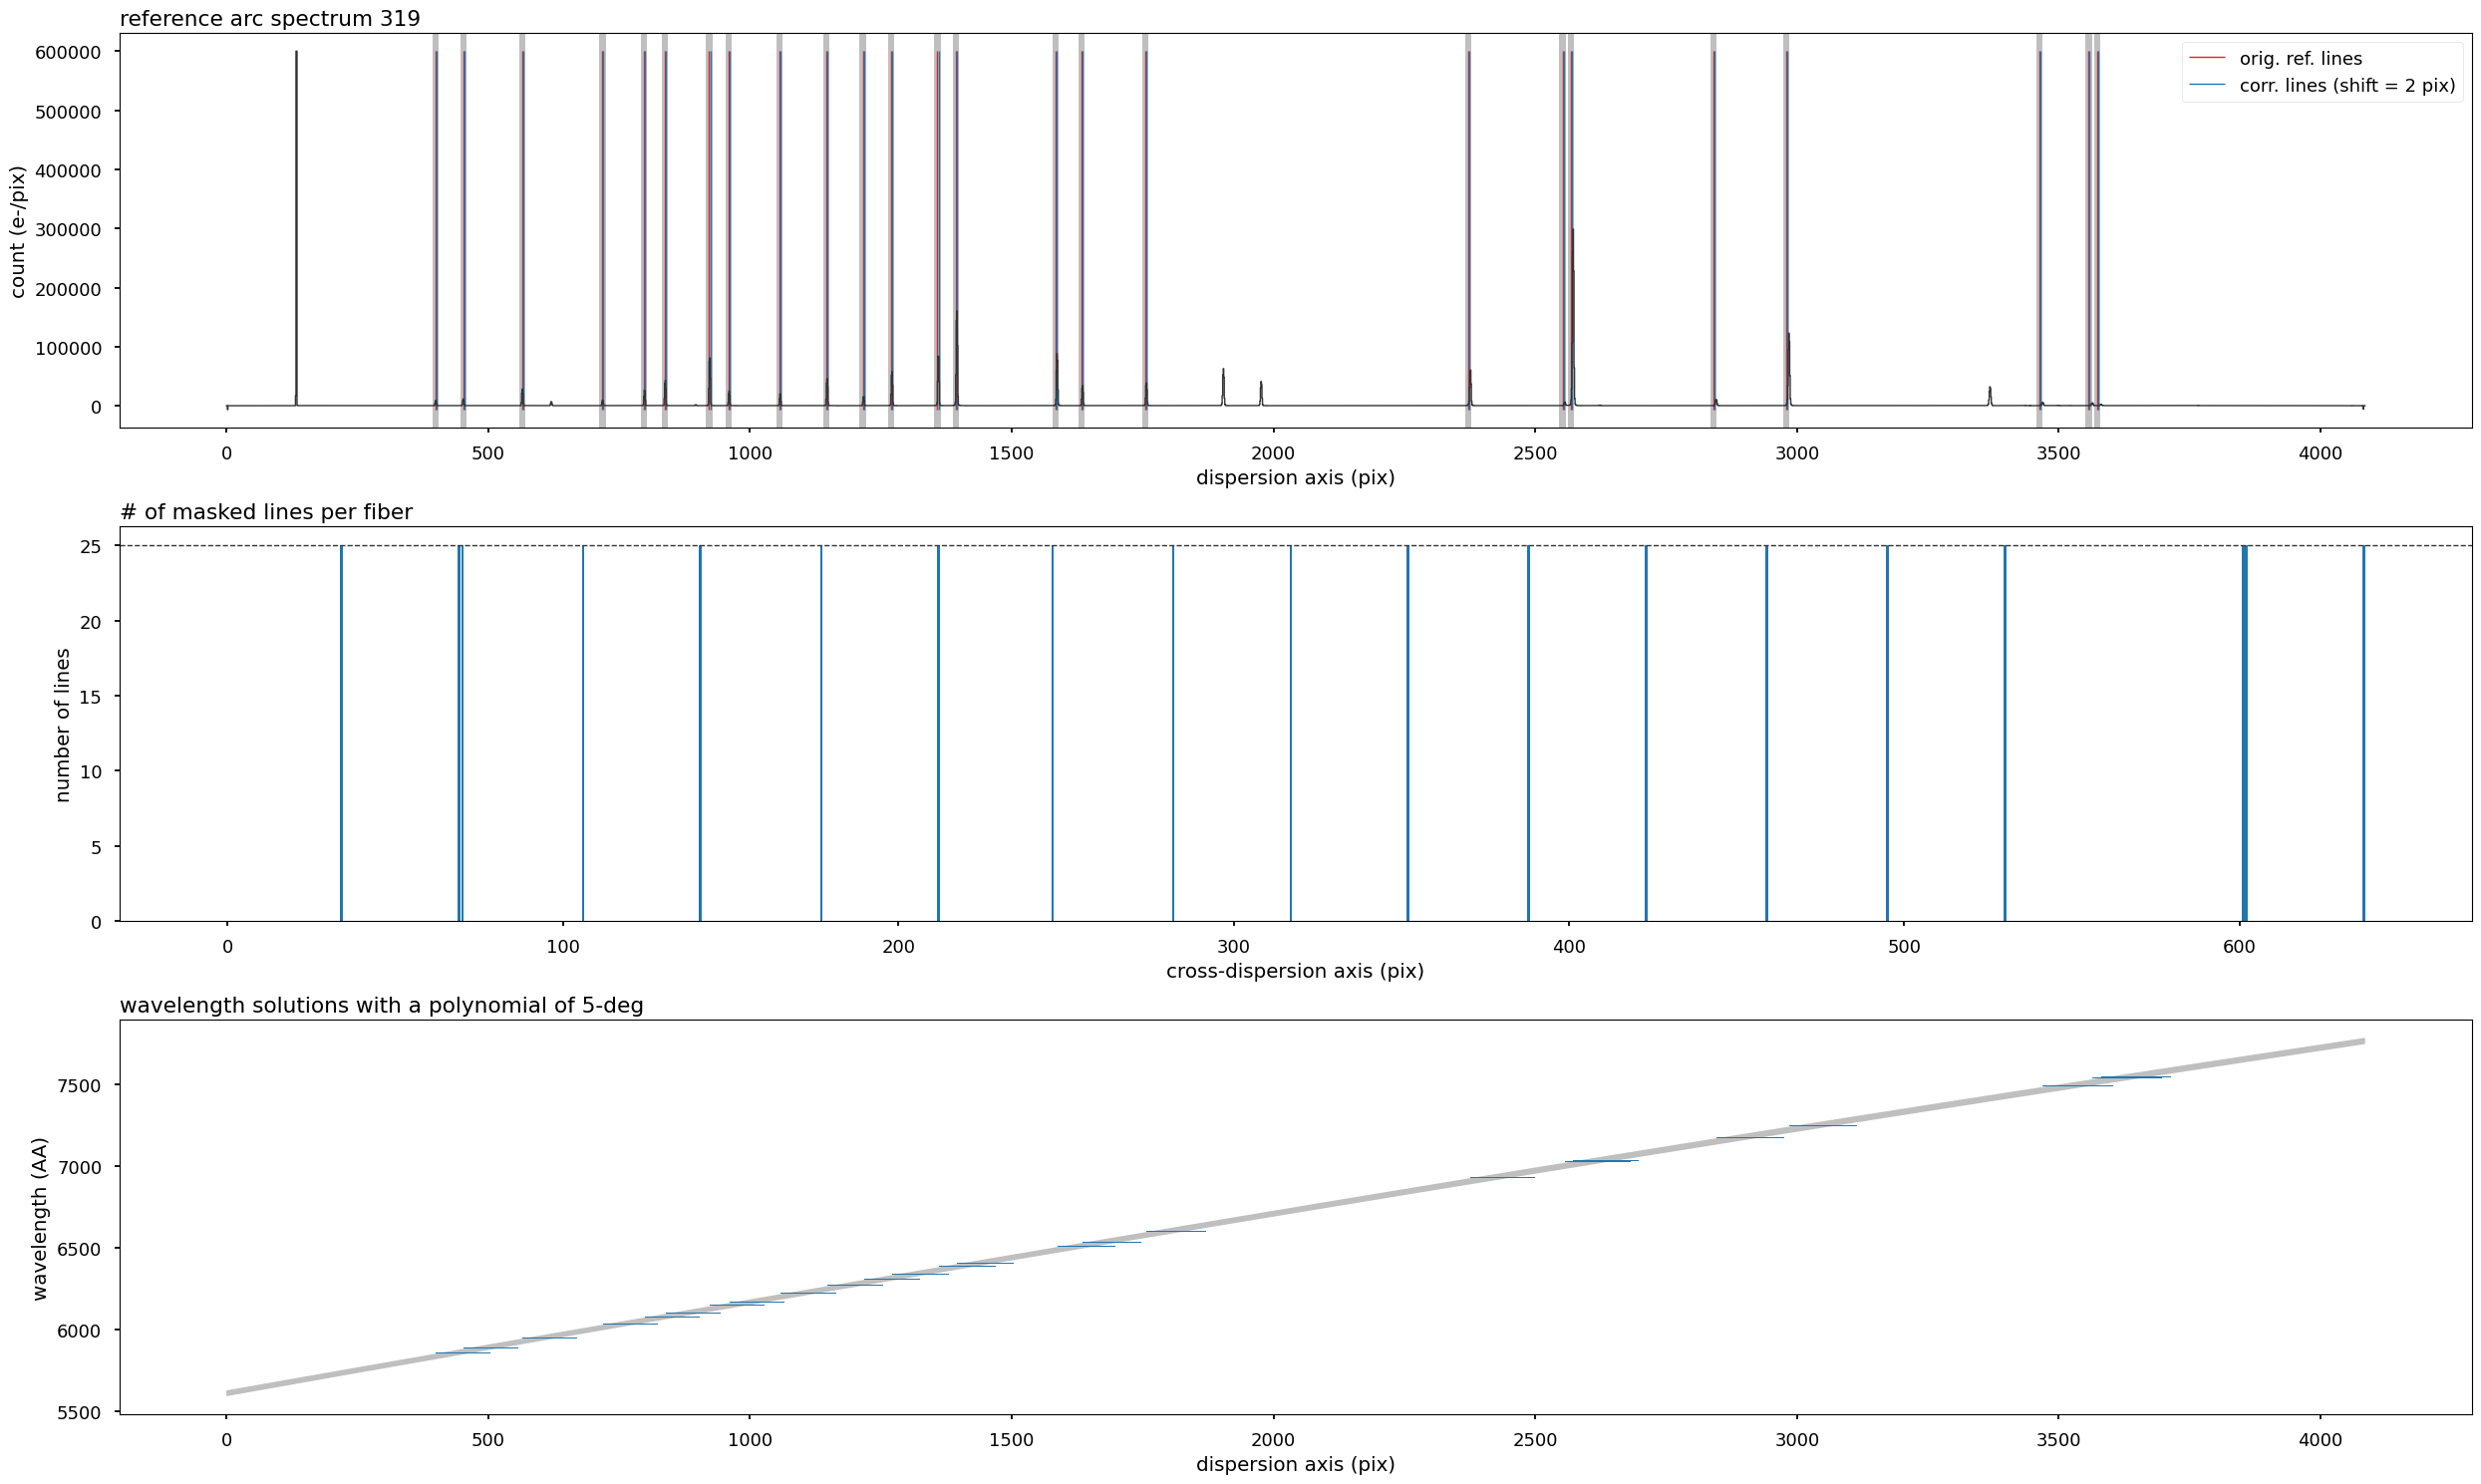

[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_z1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 26 (masked  19.2308 %)
[INFO]: measuring arc lines for each fiber from ref_fiber = 319, flux_min = 200.0, fwhm_max = 10.0 and rel_flux_limits = [0.1, 5.0]


measuring arc lines upwards from ref_fiber = 319: 100%|#################################################| 319/319 [00:07<00:00, 41.64fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|###############################################| 318/318 [00:07<00:00, 40.02fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials


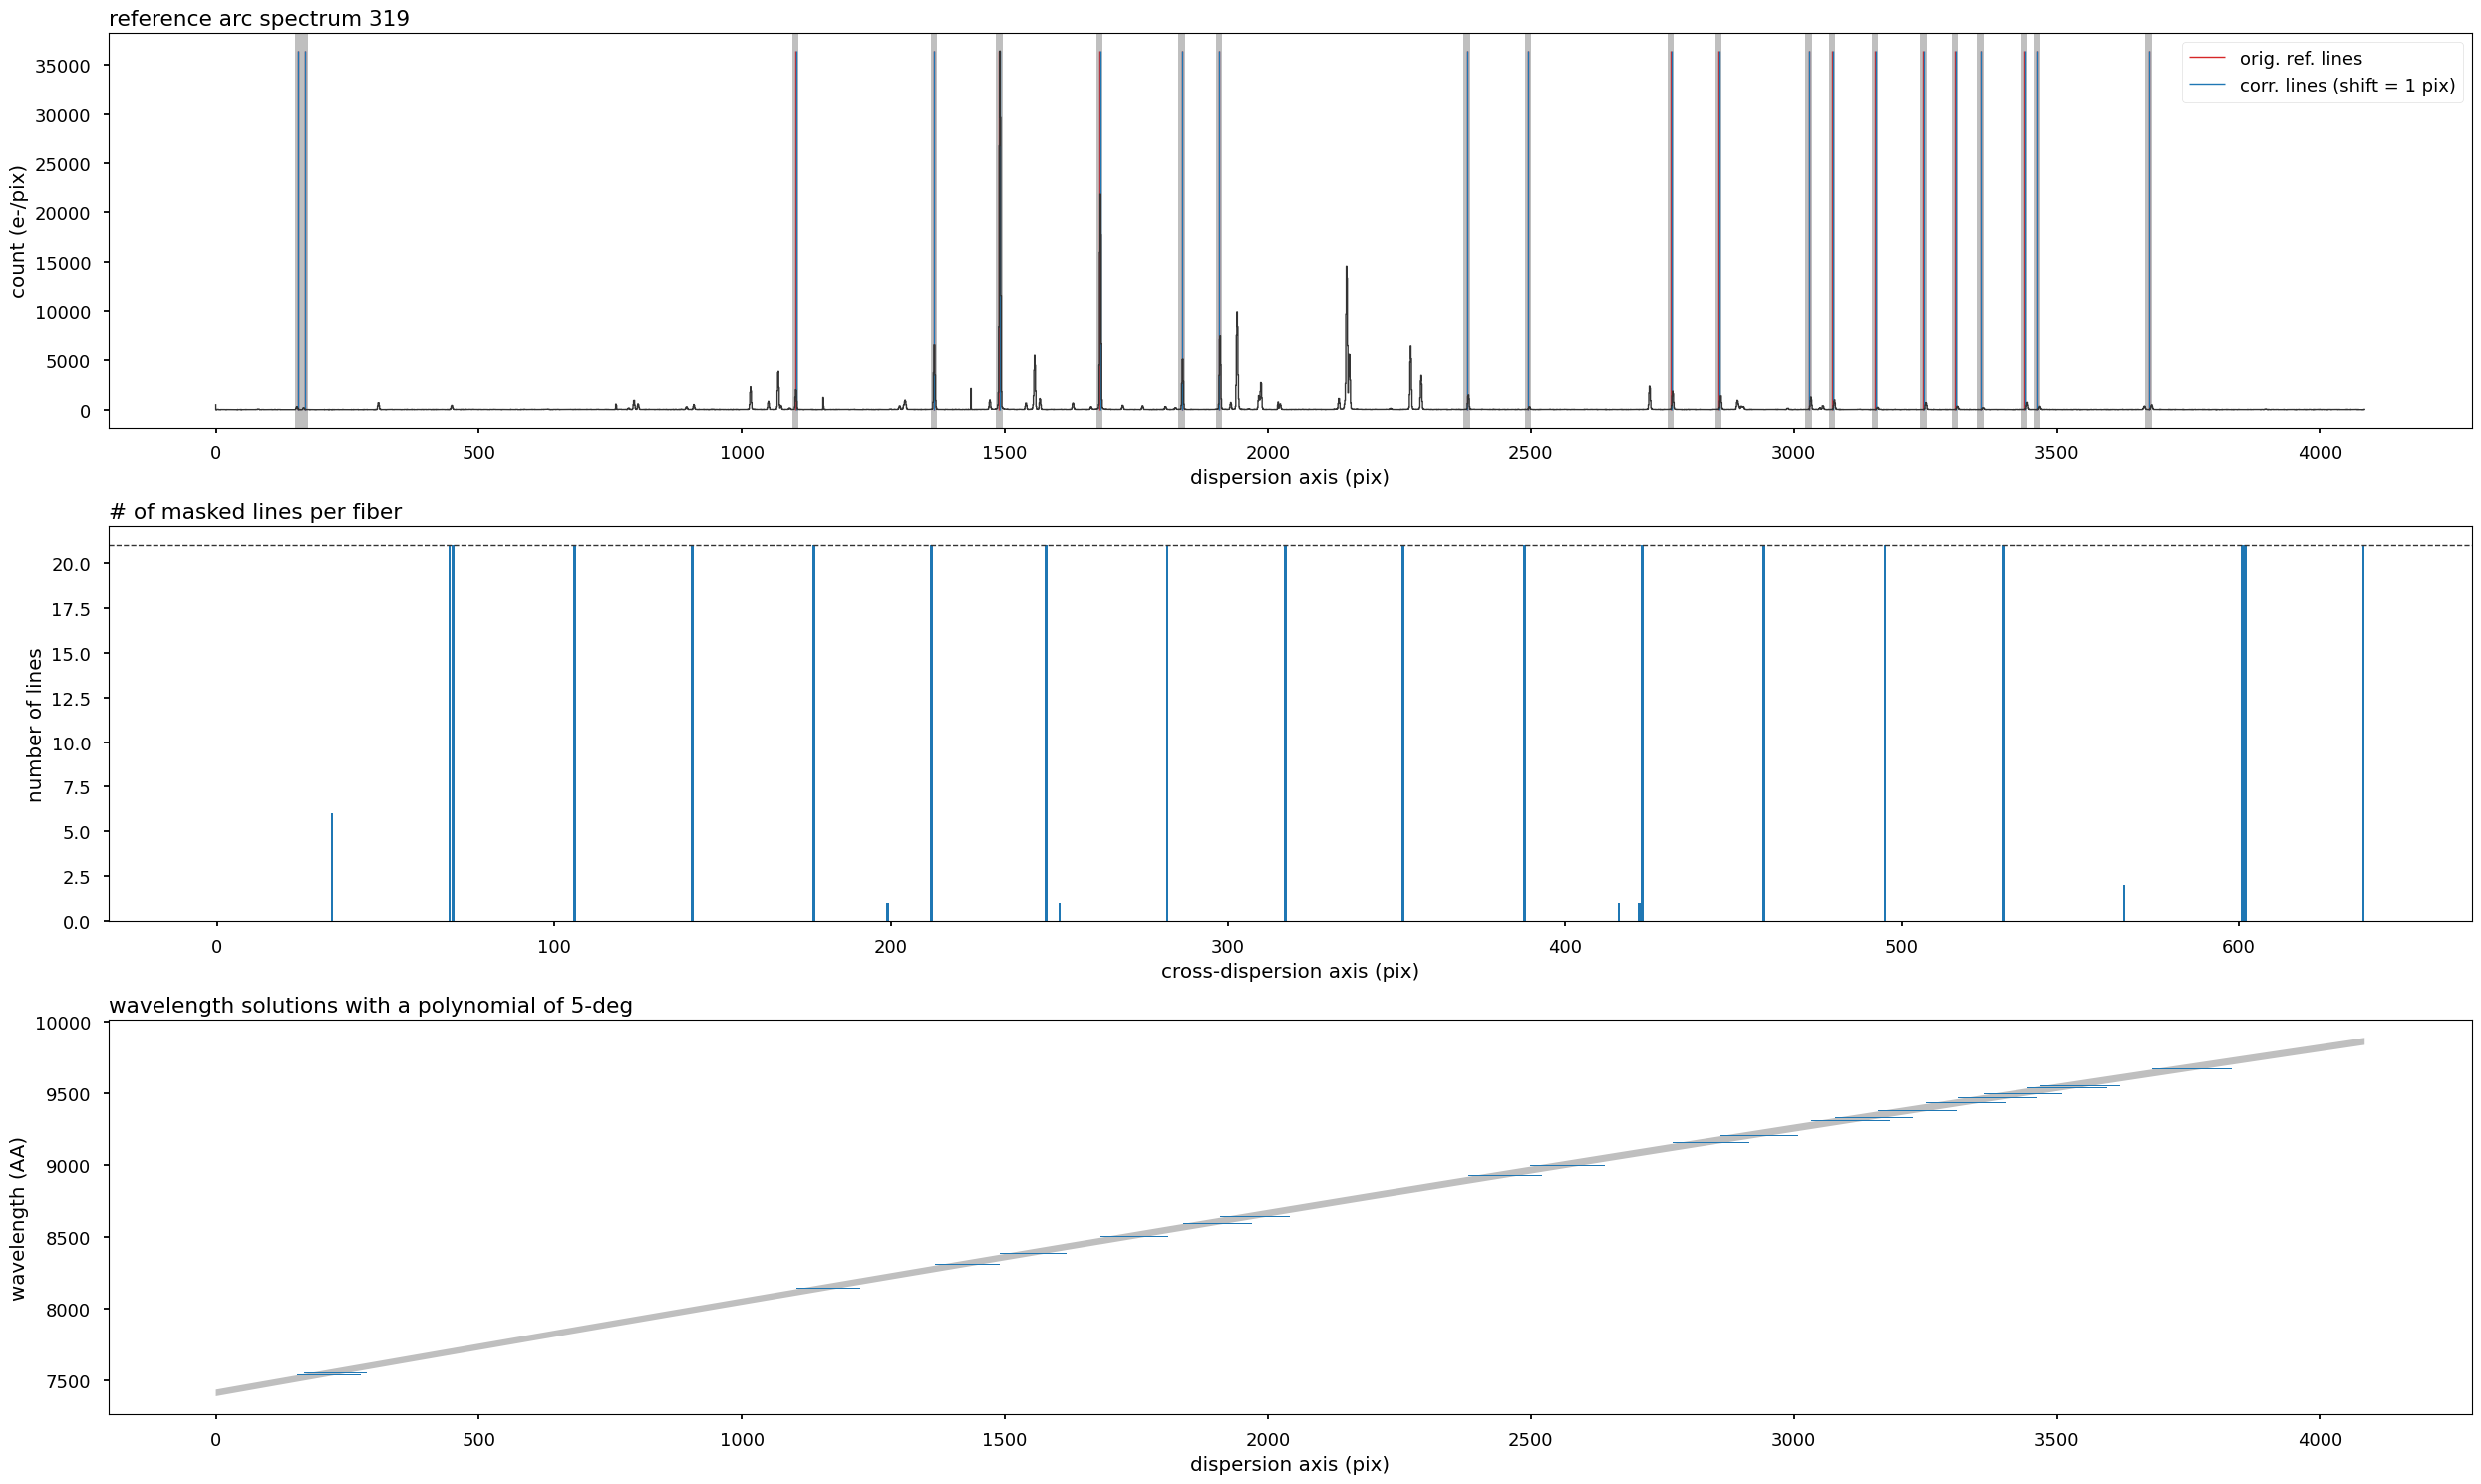

In [10]:
CHANNEL_WL = {"b1": (3600, 5930), "r1": (5660, 7720), "z1": (7470, 9800)}

ised = 319
coad = 5

for fiberflat_frame, arc_frame in zip(fiberflats, arcs):
    fiberflat_path = fiberflat_frame["path"]
    fiberflat_camera, fiberflat_expnum = fiberflat_frame["camera"], fiberflat_frame["expnum"]
    arc_path = arc_frame["path"]
    arc_camera, arc_expnum = arc_frame["camera"], arc_frame["expnum"]
    
    if arc_camera == "b1": continue
    
    wave_range = CHANNEL_WL[arc_camera]

    imageMethod.extractSpec_drp(
        in_image=out_main_path.format(kind="carc", camera=arc_camera, expnum=arc_expnum, ext="fits"),
        out_rss=out_main_path.format(kind="xarc", camera=arc_camera, expnum=arc_expnum, ext="fits"),
        in_trace=out_main_path.format(kind="trace", camera=fiberflat_camera, expnum=fiberflat_expnum, ext="fits"),
        method="aperture", aperture=4, plot=1, parallel="auto"
    )

    rssMethod.detWaveSolution_drp(
        in_arc=out_main_path.format(kind="xarc", camera=arc_camera, expnum=arc_expnum, ext="fits"),
        out_wave=out_main_path.format(kind="wave", camera=arc_camera, expnum=arc_expnum, ext="fits"),
        out_lsf=out_main_path.format(kind="lsf", camera=arc_camera, expnum=arc_expnum, ext="fits"),
        in_ref_lines=f"../../python/lvmdrp/etc/lvm-neon_nist_{arc_camera}.txt",
        ref_fiber=ised, poly_dispersion=5, poly_fwhm='2,5', aperture=13, plot=2
    )

    rssMethod.createPixTable_drp(
        in_rss=out_main_path.format(kind="xarc", camera=arc_camera, expnum=arc_expnum, ext="fits"),
        out_rss=out_main_path.format(kind="warc", camera=arc_camera, expnum=arc_expnum, ext="fits"),
        arc_wave=out_main_path.format(kind="wave", camera=arc_camera, expnum=arc_expnum, ext="fits"),
        arc_fwhm=out_main_path.format(kind="lsf", camera=arc_camera, expnum=arc_expnum, ext="fits")
    )
    
    rssMethod.resampleWave_drp(
        in_rss=out_main_path.format(kind="warc", camera=arc_camera, expnum=arc_expnum, ext="fits"),
        out_rss=out_main_path.format(kind="harc", camera=arc_camera, expnum=arc_expnum, ext="fits"),
        start_wave=wave_range[0], end_wave=wave_range[1], disp_pix=1.0, method="linear",
        err_sim=10, parallel="auto", extrapolate=True
    )

Text(0.5, 1.0, "camera = 'r1'")

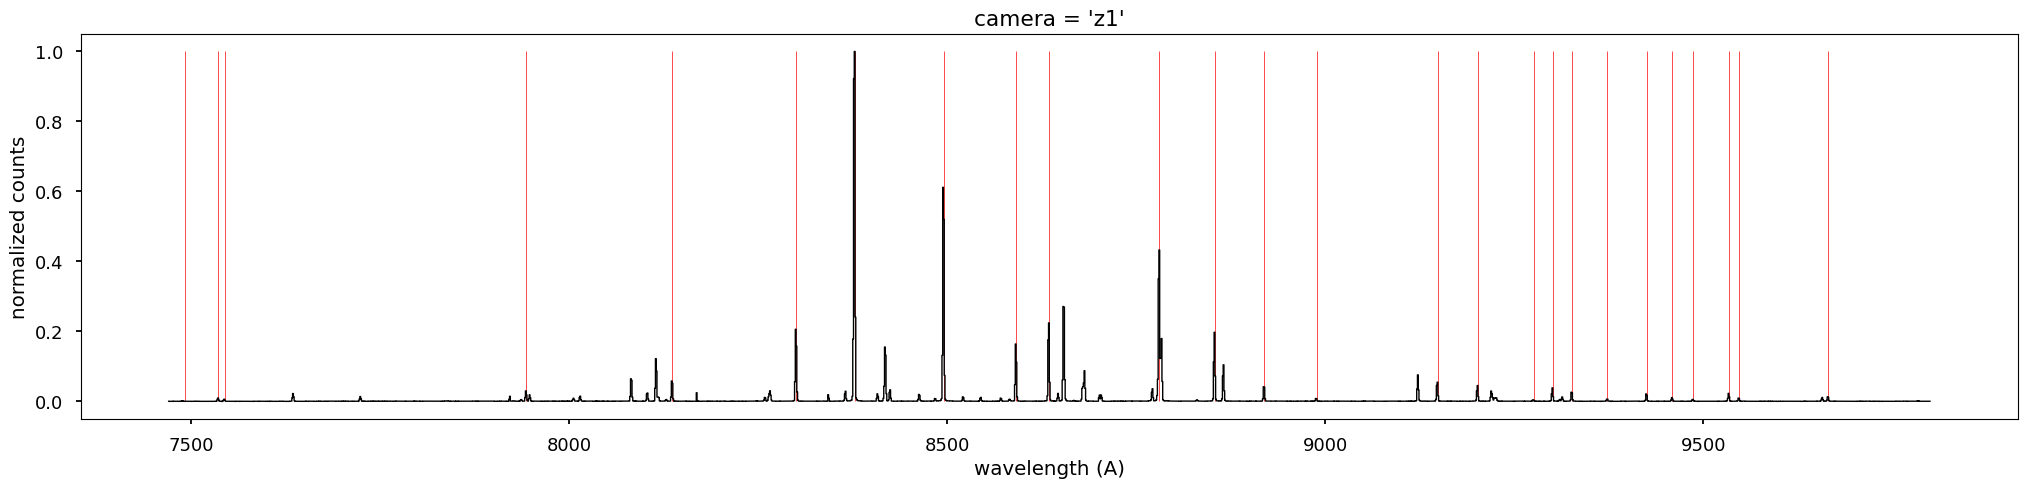

In [11]:
camera = "r1"

harc = rss.RSS()
harc.loadFitsData(out_main_path.format(kind="harc", camera=camera, expnum=arc_expnum, ext="fits"))

# with open(out_main_path.format(kind="pixwave", camera=camera, expnum=arc_expnum, ext="txt")) as f:
with open(f"../../python/lvmdrp/etc/lvm-neon_nist_{camera}.txt") as f:
    f.readline()
    lines_wav = []
    for line in f.readlines():
        _, line_wav, _ = line[:-1].split()
        lines_wav.append(float(line_wav))
    lines_wav = np.asarray(lines_wav)
    lines_int = np.ones_like(lines_wav)
    lines_min = np.zeros_like(lines_wav)

plt.figure(figsize=(25,5))
plt.vlines(lines_wav, lines_min, lines_int / lines_int, lw=0.5, ls="-", color="r")
plt.step(harc._wave, harc._data[ised]/np.nanmax(harc._data[ised]), color="k", lw=1)
plt.xlabel("wavelength (A)")
plt.ylabel("normalized counts")
plt.title(f"{camera = }")
# plt.gca().set_yscale("log")

In [12]:
for fiberflat_frame, arc_frame in zip(fiberflats, arcs):
    fiberflat_path = fiberflat_frame["path"]
    fiberflat_camera, fiberflat_expnum = fiberflat_frame["camera"], fiberflat_frame["expnum"]
    arc_path = arc_frame["path"]
    arc_camera, arc_expnum = arc_frame["camera"], arc_frame["expnum"]
    
    if arc_camera == "b1": continue
    
    wave_range = CHANNEL_WL[arc_camera]

    imageMethod.extractSpec_drp(
        in_image=out_main_path.format(kind="cfiberflat", camera=fiberflat_camera, expnum=fiberflat_expnum, ext="fits"),
        out_rss=out_main_path.format(kind="xfiberflat", camera=fiberflat_camera, expnum=fiberflat_expnum, ext="fits"),
        in_trace=out_main_path.format(kind="trace", camera=fiberflat_camera, expnum=fiberflat_expnum, ext="fits"),
        method="aperture", aperture=4, plot=1, parallel="auto"
    )
    
    rssMethod.createPixTable_drp(
        in_rss=out_main_path.format(kind="xfiberflat", camera=fiberflat_camera, expnum=fiberflat_expnum, ext="fits"),
        out_rss=out_main_path.format(kind="wfiberflat", camera=fiberflat_camera, expnum=fiberflat_expnum, ext="fits"),
        arc_wave=out_main_path.format(kind="wave", camera=arc_camera, expnum=arc_expnum, ext="fits"),
        arc_fwhm=out_main_path.format(kind="lsf", camera=arc_camera, expnum=arc_expnum, ext="fits")
    )
    
    rssMethod.resampleWave_drp(
        in_rss=out_main_path.format(kind="wfiberflat", camera=fiberflat_camera, expnum=fiberflat_expnum, ext="fits"),
        out_rss=out_main_path.format(kind="hfiberflat", camera=fiberflat_camera, expnum=fiberflat_expnum, ext="fits"),
        start_wave=wave_range[0], end_wave=wave_range[1], disp_pix=1.0, method="linear",
        err_sim=10, parallel="auto", extrapolate=True
    )

Text(0, 0.5, 'counts (e-/pix)')

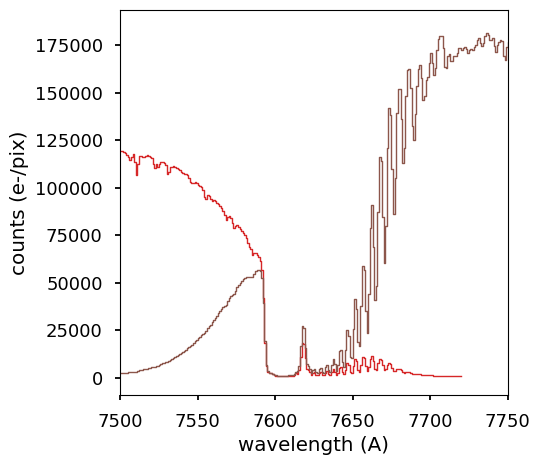

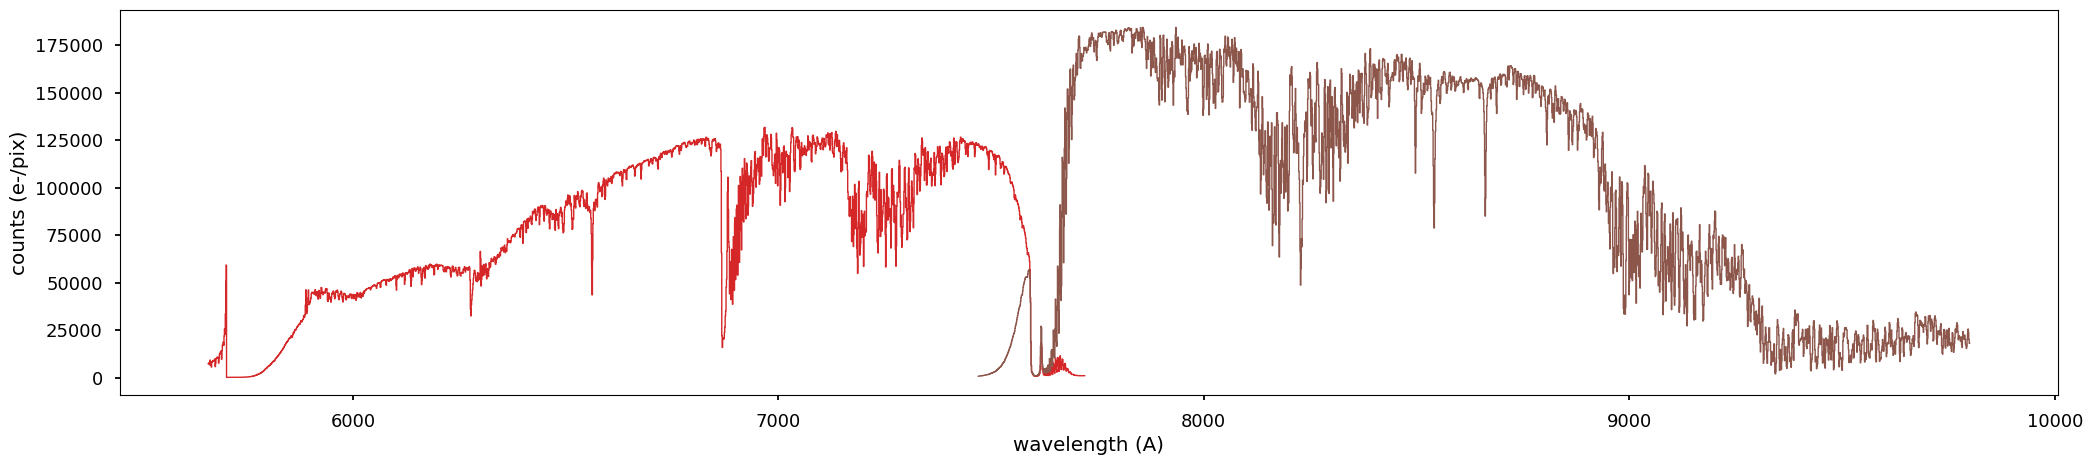

In [13]:
twilight_r = rss.RSS()
twilight_r.loadFitsData(out_main_path.format(kind="hfiberflat", camera="r1", expnum=fiberflat_expnum, ext="fits"))
superflat_r = twilight_r.create1DSpec()

twilight_z = rss.RSS()
twilight_z.loadFitsData(out_main_path.format(kind="hfiberflat", camera="z1", expnum=fiberflat_expnum, ext="fits"))
superflat_z = twilight_z.create1DSpec()

plt.figure(figsize=(5,5))
plt.step(superflat_r._wave, superflat_r._data, color="tab:red", lw=1)
plt.step(superflat_z._wave, superflat_z._data, color="tab:brown", lw=1)
plt.xlim(7500,7750)
plt.xlabel("wavelength (A)")
plt.ylabel("counts (e-/pix)")

plt.figure(figsize=(25,5))
plt.step(superflat_r._wave, superflat_r._data, color="tab:red", lw=1)
plt.step(superflat_z._wave, superflat_z._data, color="tab:brown", lw=1)
plt.xlabel("wavelength (A)")
plt.ylabel("counts (e-/pix)")

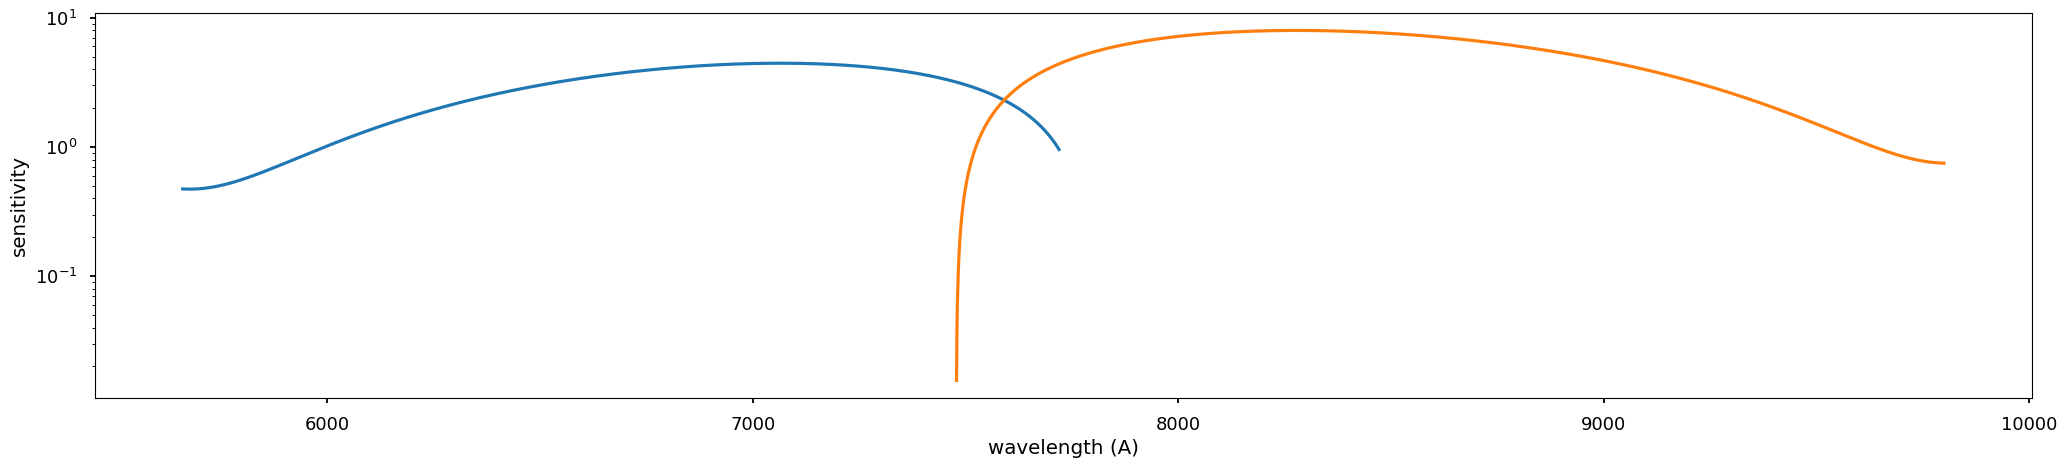

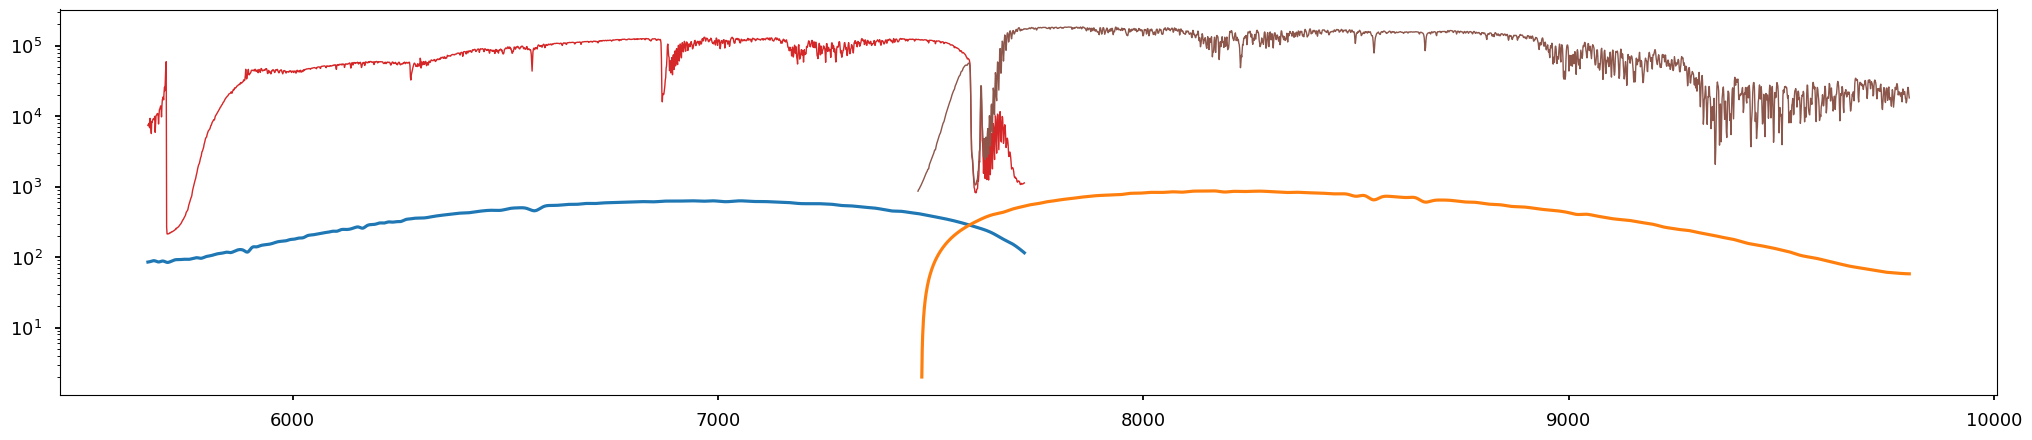

In [14]:
plt.figure(figsize=(25,5))
for camera in ["r1", "z1"]:
    fluxCalMethod.createSensFunction_drp(
        out_main_path.format(kind="hfiberflat", camera=camera, expnum=fiberflat_expnum, ext="fits"),
        out_main_path.format(kind="throughput", camera=camera, expnum=fiberflat_expnum, ext="fits"),
        extinct_curve="Paranal",
        ref_spec="../../python/lvmdrp/resources/sun.txt", column_wave=0, column_flux=1, header=0, ref_units=1,
        median_filt=0, smooth_poly=3,
        airmass=1.2,
        exptime=240,
        target_units=1,
        verbose=False
    )

    sens = spectrum1d.Spectrum1D()
    sens.loadFitsData(out_main_path.format(kind="throughput", camera=camera, expnum=fiberflat_expnum, ext="fits"))
    plt.semilogy(sens._wave[~sens._mask], 1/sens._data[~sens._mask])

plt.xlabel("wavelength (A)")
plt.ylabel("sensitivity")

sens_r = spectrum1d.Spectrum1D()
sens_r.loadFitsData(out_main_path.format(kind="throughput", camera="r1", expnum=fiberflat_expnum, ext="fits"))

sens_z = spectrum1d.Spectrum1D()
sens_z.loadFitsData(out_main_path.format(kind="throughput", camera="z1", expnum=fiberflat_expnum, ext="fits"))

sun = Sun.from_default()
sun_spec = spectrum1d.Spectrum1D(data=sun.fluxd.to("erg/(s cm2 AA)").value, wave=sun.wave.to("AA").value)
sun_r = sun_spec.resampleSpec(sens_r._wave)
sun_z = sun_spec.resampleSpec(sens_z._wave)

plt.figure(figsize=(25,5))
plt.semilogy(superflat_r._wave, superflat_r._data, color="tab:red", lw=1)
plt.semilogy(sens_r._wave[~sens_r._mask], (sun_r._data/sens_r._data)[~sens_r._mask])
plt.semilogy(superflat_z._wave, superflat_z._data, color="tab:brown", lw=1)
plt.semilogy(sens_z._wave[~sens_z._mask], (sun_z._data/sens_z._data)[~sens_z._mask])


In [15]:
objects = frames_groups[(unique_groups["imagetyp"]=="object")&(unique_groups["spec"]=="sp1")&(unique_groups["expnum"]=="00000207")]
objects.pprint(max_width=200)

for object_frame, fiberflat_frame, arc_frame in zip(objects, fiberflats, arcs):
    fiberflat_path = fiberflat_frame["path"]
    fiberflat_camera, fiberflat_expnum = fiberflat_frame["camera"], fiberflat_frame["expnum"]
    arc_path = arc_frame["path"]
    arc_camera, arc_expnum = arc_frame["camera"], arc_frame["expnum"]
    object_path = object_frame["path"]
    object_camera, object_expnum = object_frame["camera"], object_frame["expnum"]
    
    if arc_camera == "b1": continue
    
    wave_range = CHANNEL_WL[arc_camera]
    
    imageMethod.preprocRawFrame_drp(
        in_image=object_path,
        out_image=out_main_path.format(kind="pobject", camera=object_camera, expnum=object_expnum, ext="fits"),
        subtract_overscan=True, unit="electron", compute_error=True,
        os_bound_y="1,4080", os_bound_x="2044,2077",
        assume_imagetyp="object"
    )
    # imageMethod.LACosmic_drp(
    #     in_image=out_main_path.format(kind="pobject", camera=object_camera, expnum=object_expnum, ext="fits"),
    #     out_image=out_main_path.format(kind="robject", camera=object_camera, expnum=object_expnum, ext="fits"),
    #     iter=3, increase_radius=1, flim=1.3, parallel="0"
    # )
    imageMethod.basicCalibration_drp(
        in_image=out_main_path.format(kind="pobject", camera=object_camera, expnum=object_expnum, ext="fits"),
        out_image=out_main_path.format(kind="cobject", camera=object_camera, expnum=object_expnum, ext="fits"),
        in_bias=out_calib_path.format(mjd=mjd, kind="mbias", camera=bias_camera, exptime=0, expnum=bias_expnum, ext="fits"),
        in_dark=out_calib_path.format(mjd=mjd, kind="mdark", camera=object_camera, exptime=300, ext="fits")
    )
    
    imageMethod.extractSpec_drp(
        in_image=out_main_path.format(kind="cobject", camera=object_camera, expnum=object_expnum, ext="fits"),
        out_rss=out_main_path.format(kind="xobject", camera=object_camera, expnum=object_expnum, ext="fits"),
        in_trace=out_main_path.format(kind="trace", camera=fiberflat_camera, expnum=fiberflat_expnum, ext="fits"),
        method="aperture", aperture=4, plot=1, parallel="auto"
    )
    
    rssMethod.createPixTable_drp(
        in_rss=out_main_path.format(kind="xobject", camera=object_camera, expnum=object_expnum, ext="fits"),
        out_rss=out_main_path.format(kind="wobject", camera=object_camera, expnum=object_expnum, ext="fits"),
        arc_wave=out_main_path.format(kind="wave", camera=arc_camera, expnum=arc_expnum, ext="fits"),
        arc_fwhm=out_main_path.format(kind="lsf", camera=arc_camera, expnum=arc_expnum, ext="fits")
    )
    
    rssMethod.resampleWave_drp(
        in_rss=out_main_path.format(kind="wobject", camera=object_camera, expnum=object_expnum, ext="fits"),
        out_rss=out_main_path.format(kind="hobject", camera=object_camera, expnum=object_expnum, ext="fits"),
        start_wave=wave_range[0], end_wave=wave_range[1], disp_pix=1.0, method="linear",
        err_sim=10, parallel="auto", extrapolate=True
    )

imagetyp spec  mjd  camera  expnum  exptime                                                                   path                                                                 
-------- ---- ----- ------ -------- ------- ---------------------------------------------------------------------------------------------------------------------------------------
  object  sp1 60011     b1 00000207   900.0 /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/data/lvm/lab/60011/sdR-s-b1-00000207.fits.gz
  object  sp1 60011     r1 00000207   900.0 /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/data/lvm/lab/60011/sdR-s-r1-00000207.fits.gz
  object  sp1 60011     z1 00000207   900.0 /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/data/lvm/lab/60011/sdR-s-z1-00000207.fits.gz
[INFO]: using given overscan region Y = ['1', '4080'], X = ['2044', '2077']
[WARNING]: assuming 'TRI

Text(0.5, 1.0, "object_expnum = '00000207'")

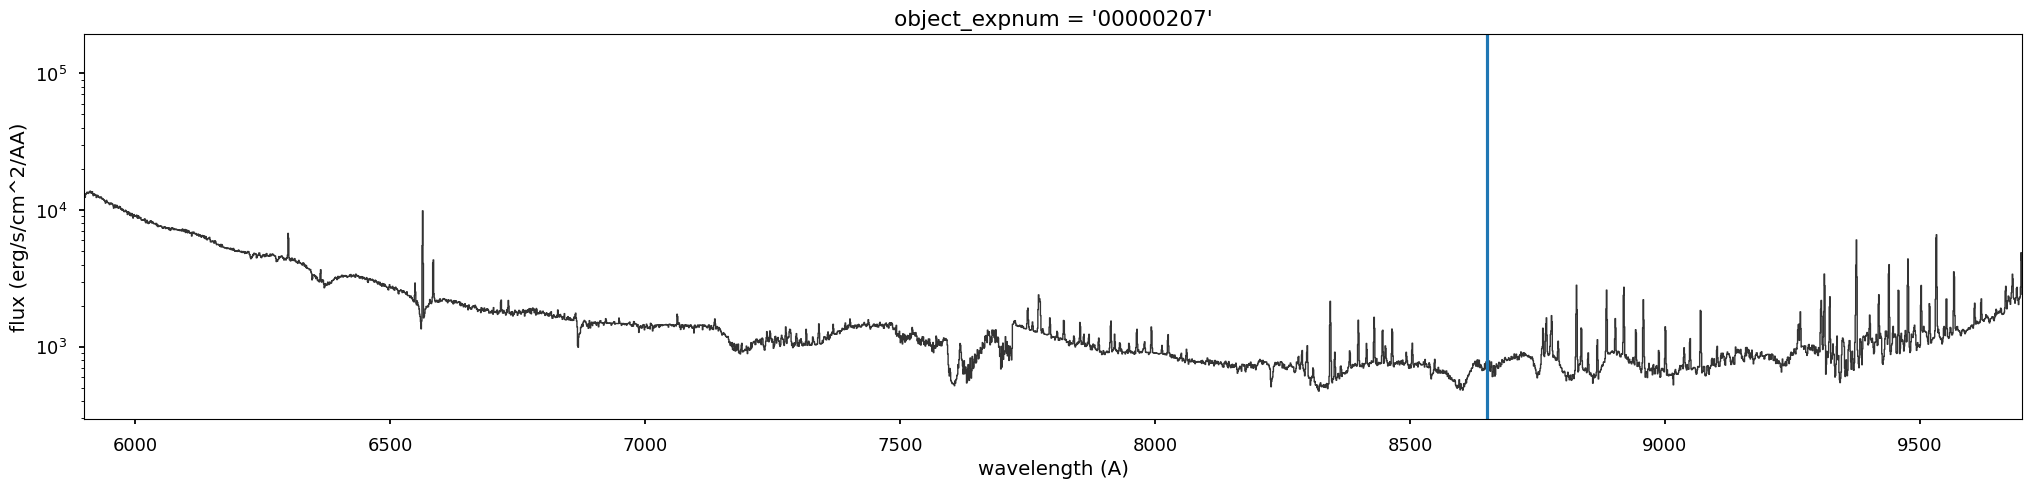

In [16]:
object_r = rss.RSS()
object_r.loadFitsData(out_main_path.format(kind="hobject", camera="r1", expnum=object_expnum, ext="fits"))
superobject_r = object_r.create1DSpec()
superobject_r._inst_fwhm = superobject_r._inst_fwhm.mean(axis=0)

object_z = rss.RSS()
object_z.loadFitsData(out_main_path.format(kind="hobject", camera="z1", expnum=object_expnum, ext="fits"))
superobject_z = object_z.create1DSpec()
superobject_z._inst_fwhm = superobject_z._inst_fwhm.mean(axis=0)

sens_r = spectrum1d.Spectrum1D()
sens_r.loadFitsData(out_main_path.format(kind="throughput", camera="r1", expnum=fiberflat_expnum, ext="fits"))
sens_z = spectrum1d.Spectrum1D()
sens_z.loadFitsData(out_main_path.format(kind="throughput", camera="z1", expnum=fiberflat_expnum, ext="fits"))

superobject_r *= sens_r
superobject_z *= sens_z

superobject = superobject_r.coaddSpec(superobject_z)

plt.figure(figsize=(25,5))
# plt.step(superobject_r._wave, superobject_r._data, color="tab:red", lw=1)
# plt.step(superobject_z._wave, superobject_z._data, color="tab:brown", lw=1)
# plt.vlines(wave_lines, 0, 1e5, lw=1, color="tab:red")
plt.step(superobject._wave, superobject._data, color="0.2", lw=1)
plt.gca().set_yscale("log")
plt.axvline(8650)
# plt.ylim(-500, 3000)
plt.xlim(5900, 9700)
plt.xlabel("wavelength (A)")
plt.ylabel("flux (erg/s/cm^2/AA)")
plt.title(f"{object_expnum = }")

[WARNING]: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect. (UserWarning)


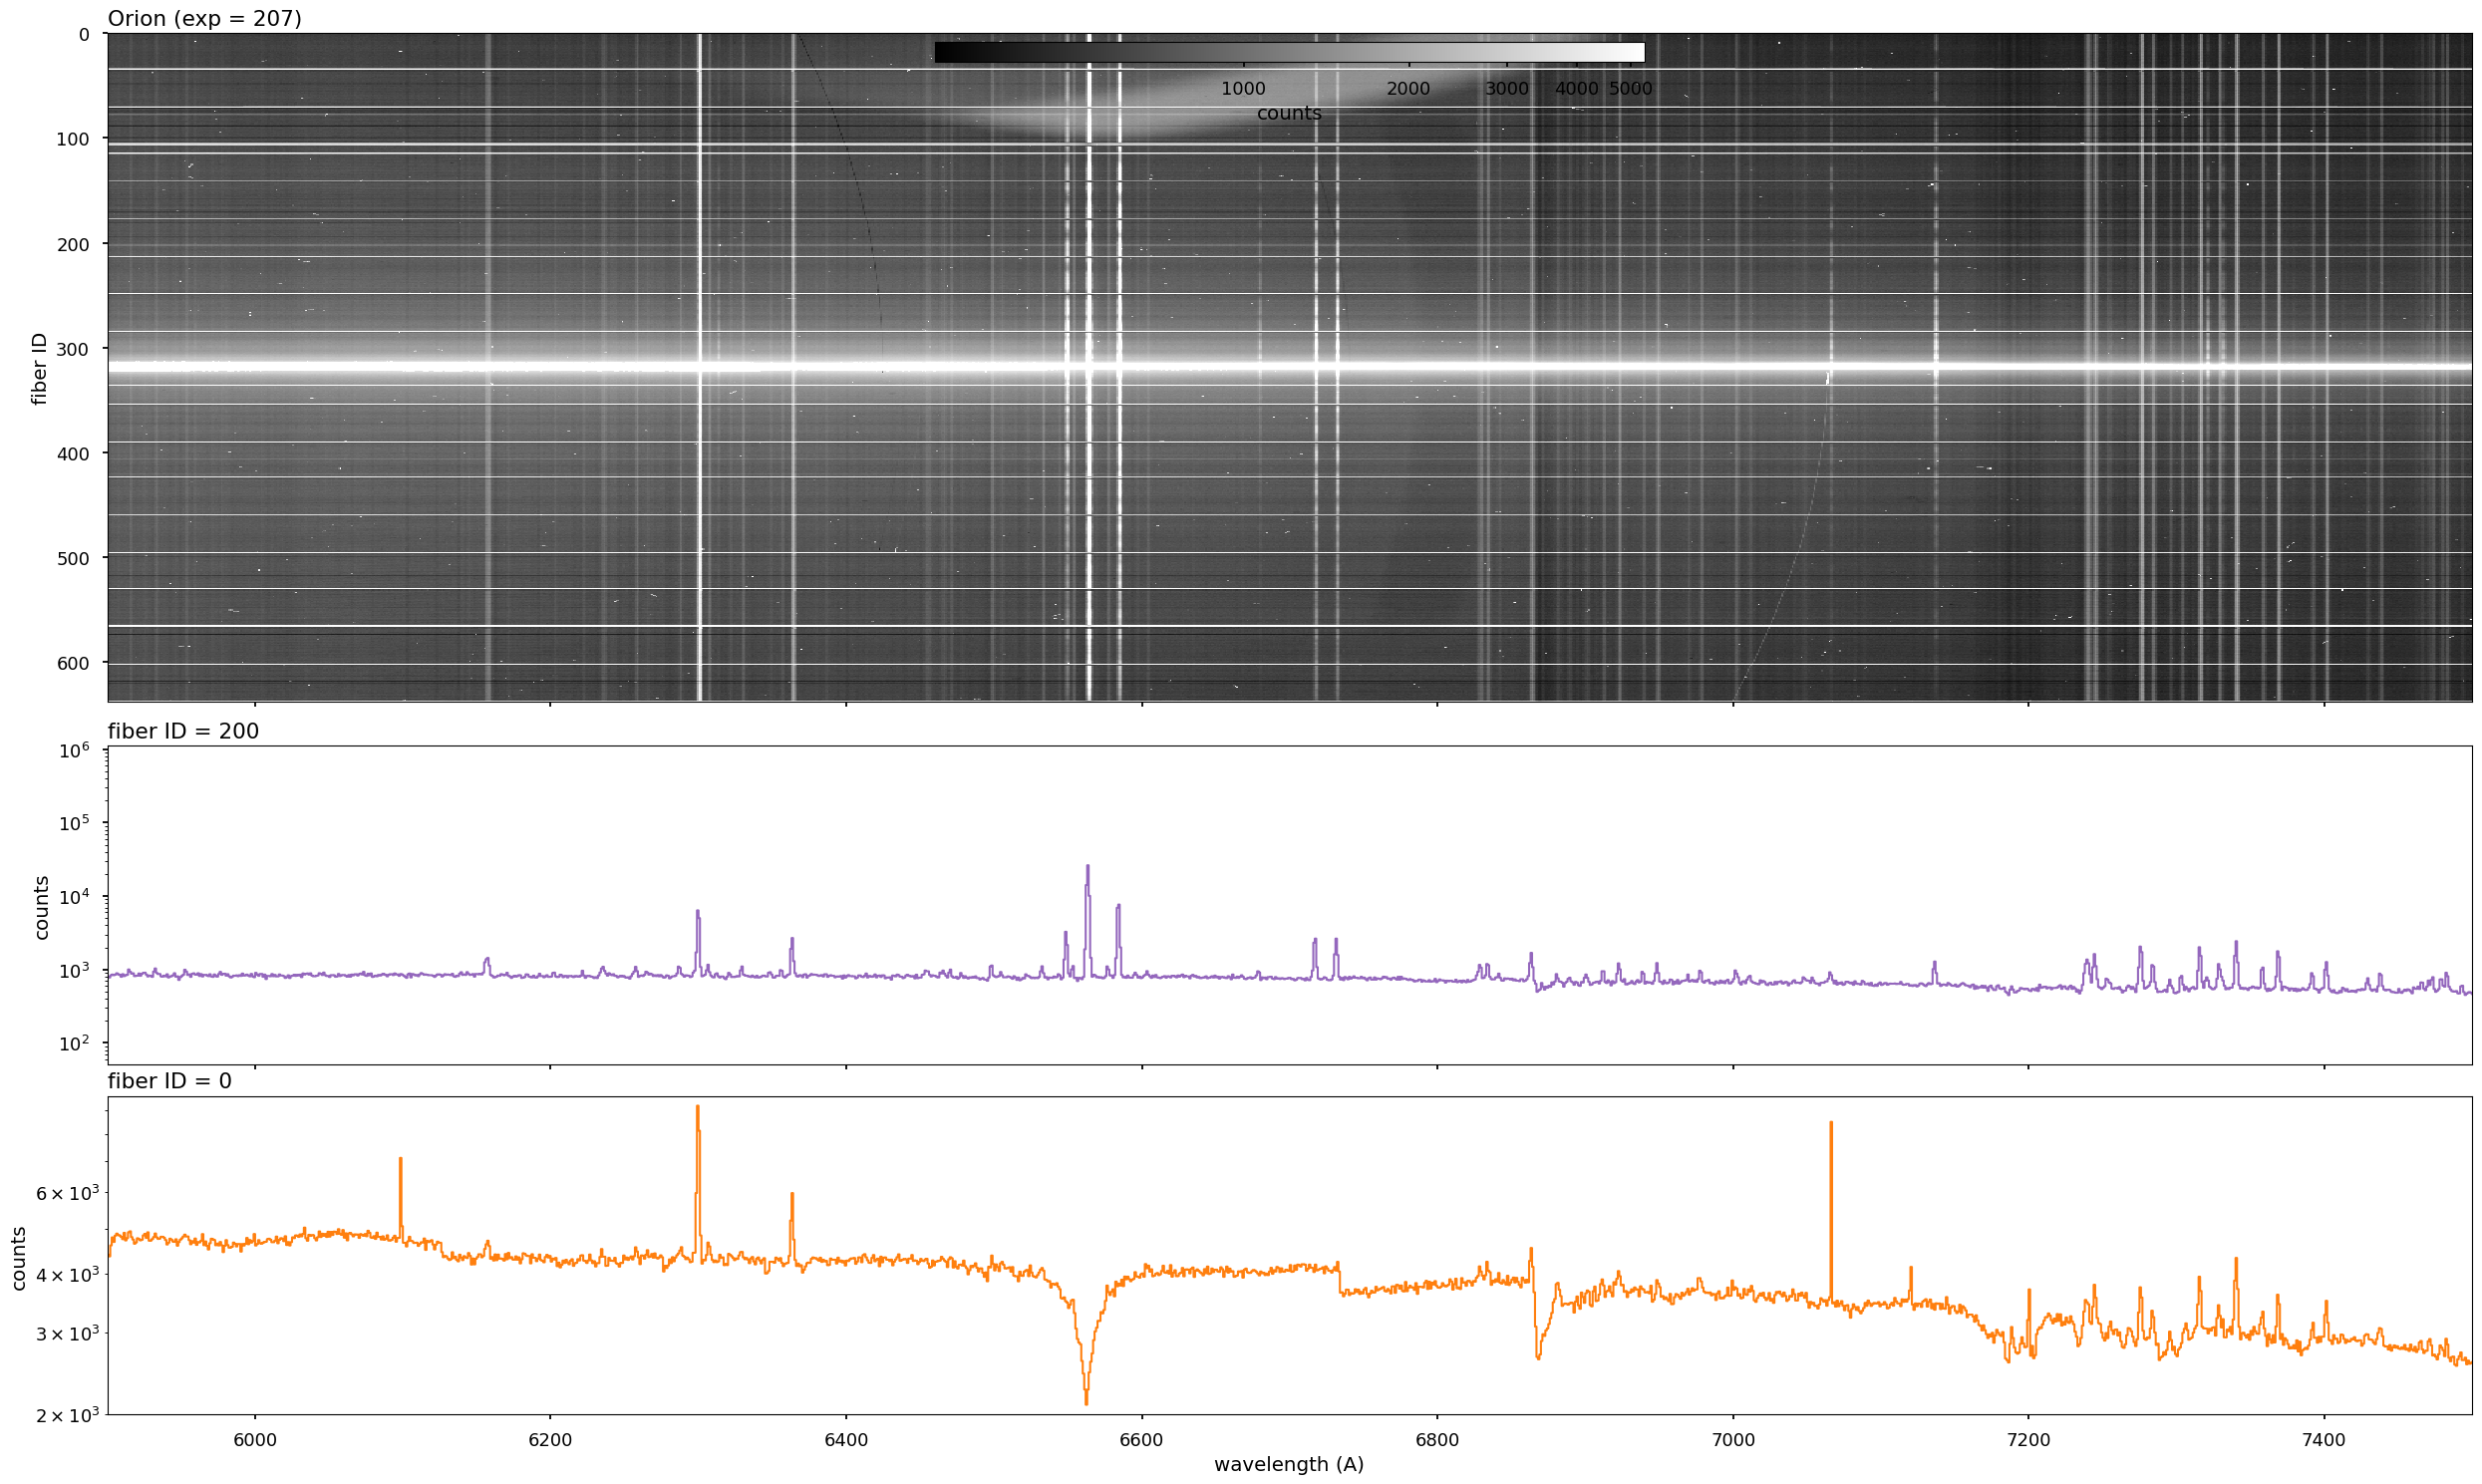

In [17]:
wave_lines, name_lines = np.loadtxt("../../../../lvm-dap/_fitting-data/_configs/MaNGA/emission_lines_long_list.MaNGA", dtype=str, unpack=True)
wave_lines = wave_lines.astype(float)

object_r = rss.RSS()
object_r.loadFitsData(out_main_path.format(kind="hobject", camera="r1", expnum="00000207", ext="fits"))

data = object_r._data
wave = object_r._wave

fiber_1 = 200
fiber_2 = 0
xmin, xmax = data.shape[0], 0
ymin, ymax = wave.min(), wave.max()

fig, (ax1, ax_neb) = plt.subplots(2, 1, figsize=(25,15), sharex=True, sharey=False)
ax1_divider = make_axes_locatable(ax_neb)
ax_ste = ax1_divider.append_axes("bottom", size="100%", pad="10%")
ax_ste.sharex(ax_neb)
ax_neb.tick_params(labelbottom=False)

norm = ImageNormalize(data, interval=PercentileInterval(95), stretch=AsinhStretch())
im1 = ax1.imshow(data, extent=(ymin,ymax,xmin,xmax), origin="lower", cmap=plt.cm.gray, norm=norm, interpolation="none", aspect="auto")

ax_neb.step(wave, data[fiber_1], color="tab:purple", lw=1.5)
ax_ste.step(wave, data[fiber_2], color="tab:orange", lw=1.5)

axins1 = inset_axes(ax1, width="30%", height="3%", loc="upper center")
axins1.xaxis.set_ticks_position("bottom")
cba = fig.colorbar(im1, cax=axins1, orientation="horizontal")

ax_neb.set_xlim(5900, 7500)
ax_ste.set_ylim(2e3, ax_ste.get_ylim()[1])
ax_ste.set_yscale("log")
ax_neb.set_yscale("log")

ax1.set_title("Orion (exp = 207)", loc="left")
ax_neb.set_title(f"fiber ID = {fiber_1}", loc="left")
ax_ste.set_title(f"fiber ID = {fiber_2}", loc="left")
ax1.set_ylabel("fiber ID")
ax_neb.set_ylabel("counts")
ax_ste.set_ylabel("counts")
ax_ste.set_xlabel("wavelength (A)")
cba.set_label("counts")
fig.tight_layout()